In [87]:
import matplotlib.pyplot as plt

In [88]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("WDI Analysis") \
    .getOrCreate()

In [89]:
file_path = "data/Data.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [90]:
# Country Categories
innovative_countries = ["CHE", "SWE", "SGP", "GBR", "KOR", "FIN", "NLD", "DEU", "DNK", "ESP"]
neighbour_countries = ["PRT", "FRA", "ITA", "ESP"]
countries = [innovative_countries,neighbour_countries]

In [91]:
# Indicators by topic
economic_indicators = ["NY.GDP.MKTP.CD","NY.GDP.PCAP.CD","NY.GDP.MKTP.KD.ZG","NY.GNP.PCAP.CD",
                       "SI.POV.GINI","FP.CPI.TOTL.ZG"]
education_indicators = ["SE.XPD.TOTL.GB.ZS","SE.XPD.TOTL.GD.ZS","SE.SEC.ENRR","SE.TER.ENRR",
                        "SE.TER.CUAT.BA.ZS","SE.TER.CUAT.MS.ZS","SE.TER.CUAT.DO.ZS","SE.TER.ENRL.TC.ZS",
                        "SE.XPD.CPRM.ZS","SE.XPD.CSEC.ZS","SE.XPD.CTER.ZS","SE.XPD.PRIM.PC.ZS",
                        "SE.XPD.SECO.PC.ZS","SE.XPD.TERT.PC.ZS"]
energy_indicators = ["EG.USE.PCAP.KG.OE","EG.USE.ELEC.KH.PC","EG.ELC.NUCL.ZS",
                     "EG.ELC.RNEW.ZS"]
research_dev_indicators = ["GB.XPD.RSDV.GD.ZS","SP.POP.SCIE.RD.P6","SP.POP.TECH.RD.P6","IP.PAT.RESD",
                           "IP.PAT.NRES","IP.JRN.ARTC.SC","IT.NET.USER.ZS","IT.CEL.SETS.P2",
                           "IT.NET.BBND.P2","IT.NET.SECR.P6","TX.VAL.TECH.MF.ZS","TX.VAL.TECH.CD"]

In [92]:
#Columns select
years = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
fixed_columns = ["Country Name", "Indicator Name"]
selected_columns = fixed_columns + years

In [93]:
def filter_and_select(df, countries, indicator, selected_columns):
    return (
        df.filter((df["Country Code"].isin(countries)) & (df["Indicator Code"] == indicator))
          .select(selected_columns)
    )

In [94]:
def prepare_data_for_plotting(spark_df, years):
    pandas_df = spark_df.toPandas()
    melted_df = pandas_df.melt(
        id_vars=["Country Name"], 
        value_vars=years, 
        var_name="Year", 
        value_name="Value"
    )
    melted_df["Year"] = melted_df["Year"].astype(int)
    return melted_df

In [95]:
def plot_indicator(data, indicator, category):

    plt.figure(figsize=(12, 6))
    for country in data["Country Name"].unique():
        subset = data[data["Country Name"] == country]
        plt.plot(
            subset["Year"], 
            subset["Value"], 
            label=country if country == "Spain" else None, 
            color="blue" if country == "Spain" else "lightgray", 
            linewidth=2 if country == "Spain" else 1,
            alpha=0.8 if country == "Spain" else 0.6
        )
    
    plt.title(f"{category} Countries - Indicator: {indicator}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend(title="Country", loc="upper left")
    plt.grid(True)
    plt.show()

In [96]:
def analyze_indicators(df, indicator_list, countries, selected_columns, years, category_name):
    for indicator in indicator_list:
        for country_category, country_list in zip(["Innovative", "Neighbor"], countries):
            print(f"Countries: {country_category}")
            
            df_select = filter_and_select(df, country_list, indicator, selected_columns)

            indicator_name = df_select.select('Indicator Name').first()['Indicator Name']

            print(f"Analyzing indicator: {indicator_name}, Indicator Code: {indicator}")
        
            melted_df = prepare_data_for_plotting(df_select, years)
            
            plot_indicator(melted_df, indicator_name, f"{category_name} - {country_category}")

In [97]:

categories_indicators = [
    ("Economic Indicators", economic_indicators),
    ("Education Indicators", education_indicators),
    ("Energy Indicators", energy_indicators),
    ("Research & Development Indicators", research_dev_indicators),
]


=== Analyzing Economic Indicators ===
Countries: Innovative
Analyzing indicator: GDP (current US$), Indicator Code: NY.GDP.MKTP.CD


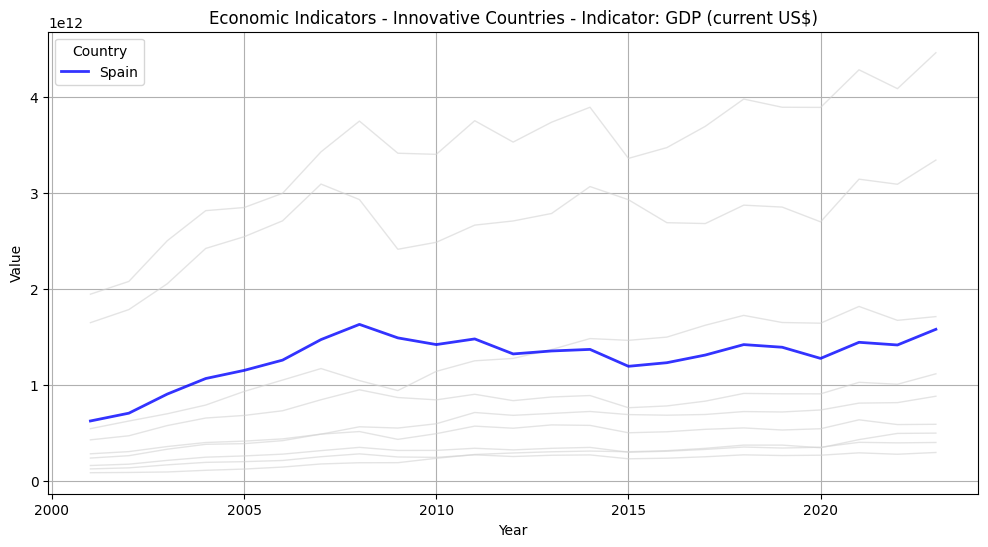

Countries: Neighbor
Analyzing indicator: GDP (current US$), Indicator Code: NY.GDP.MKTP.CD


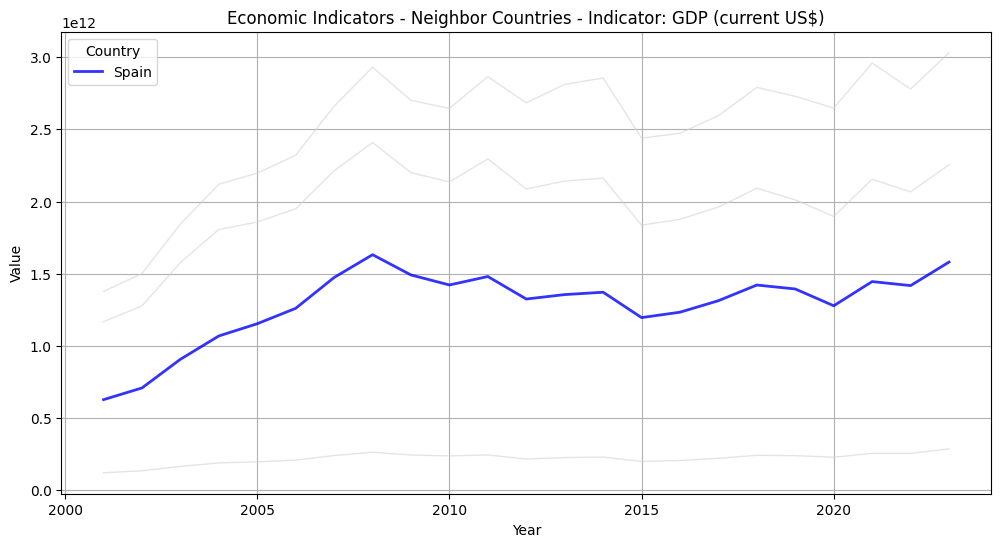

Countries: Innovative
Analyzing indicator: GDP per capita (current US$), Indicator Code: NY.GDP.PCAP.CD


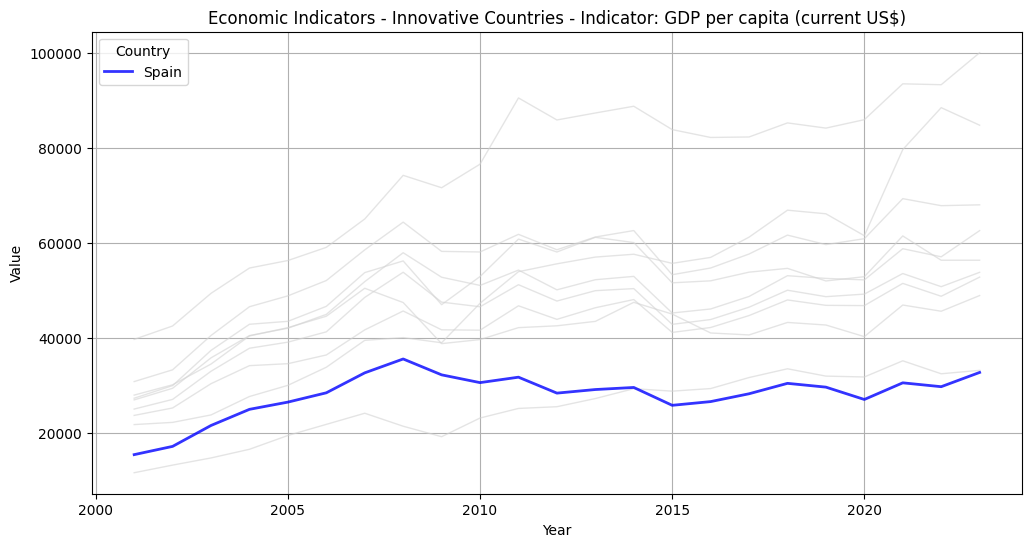

Countries: Neighbor
Analyzing indicator: GDP per capita (current US$), Indicator Code: NY.GDP.PCAP.CD


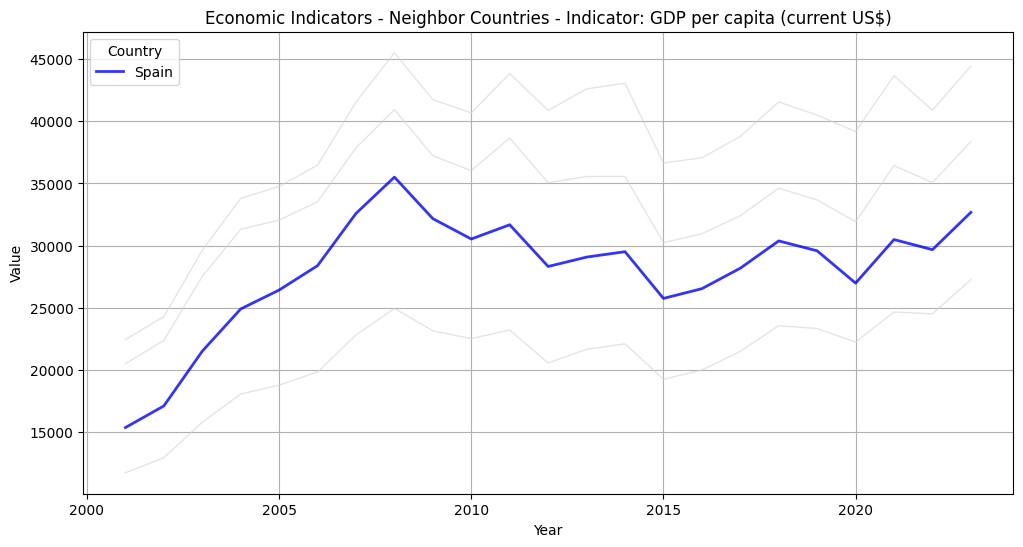

Countries: Innovative
Analyzing indicator: GDP growth (annual %), Indicator Code: NY.GDP.MKTP.KD.ZG


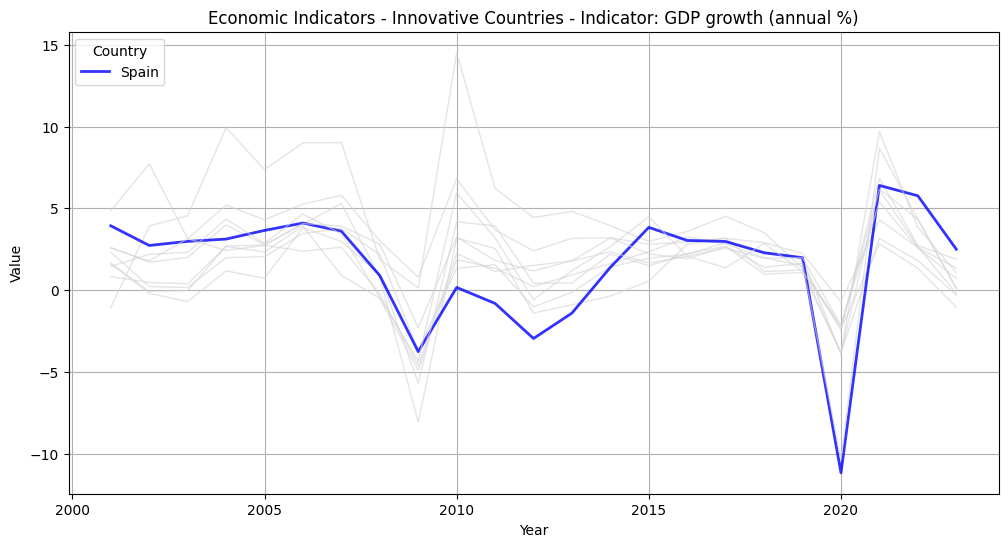

Countries: Neighbor
Analyzing indicator: GDP growth (annual %), Indicator Code: NY.GDP.MKTP.KD.ZG


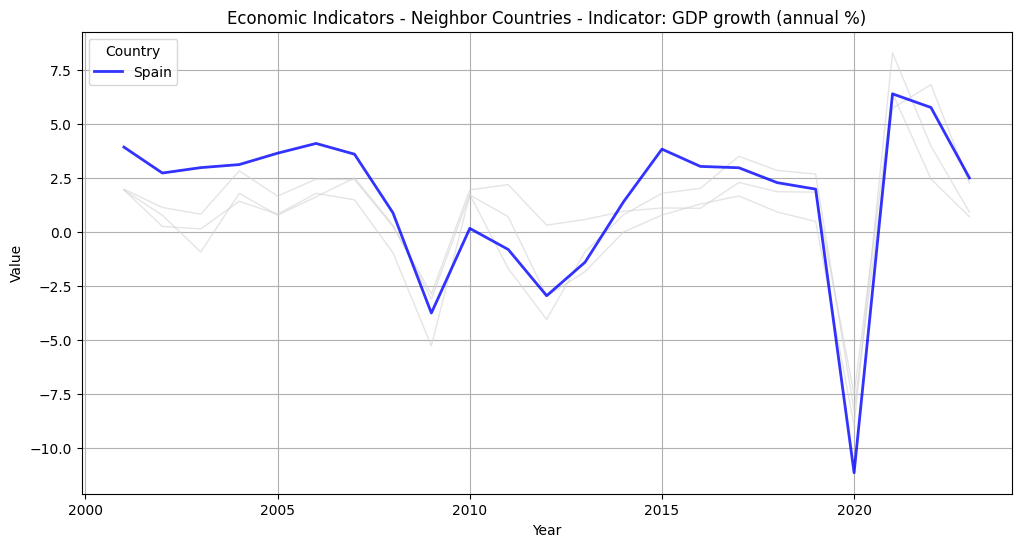

Countries: Innovative
Analyzing indicator: GNI per capita, Atlas method (current US$), Indicator Code: NY.GNP.PCAP.CD


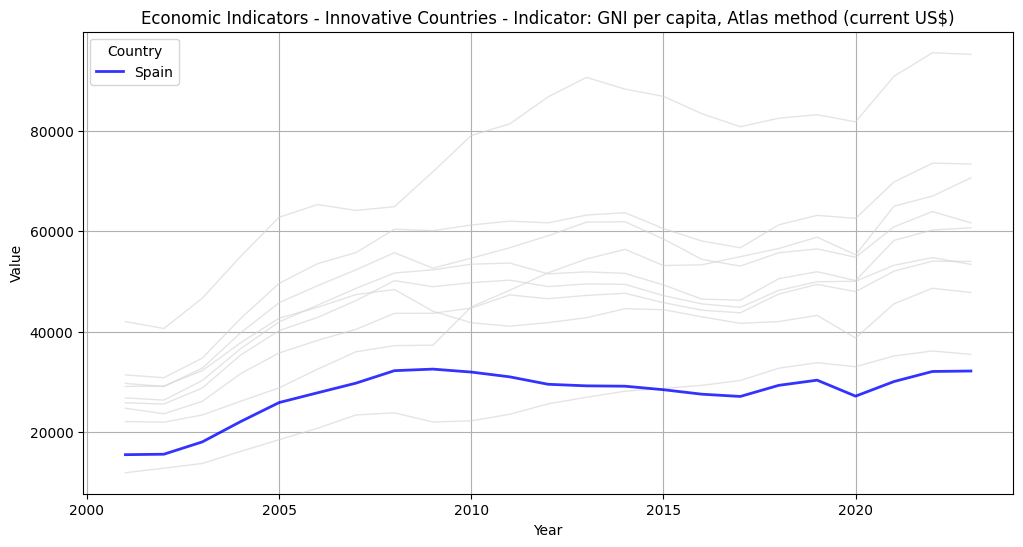

Countries: Neighbor
Analyzing indicator: GNI per capita, Atlas method (current US$), Indicator Code: NY.GNP.PCAP.CD


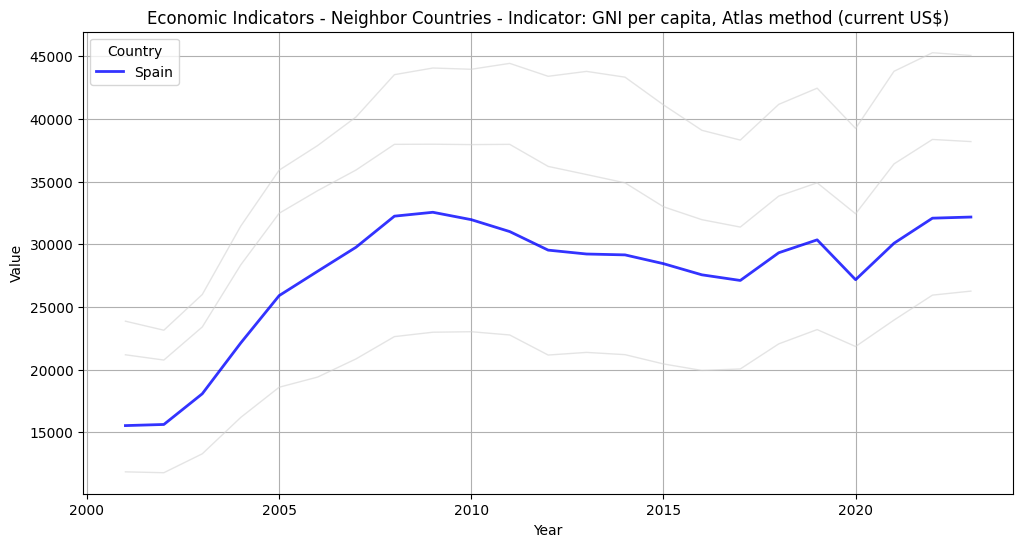

Countries: Innovative
Analyzing indicator: Gini index, Indicator Code: SI.POV.GINI


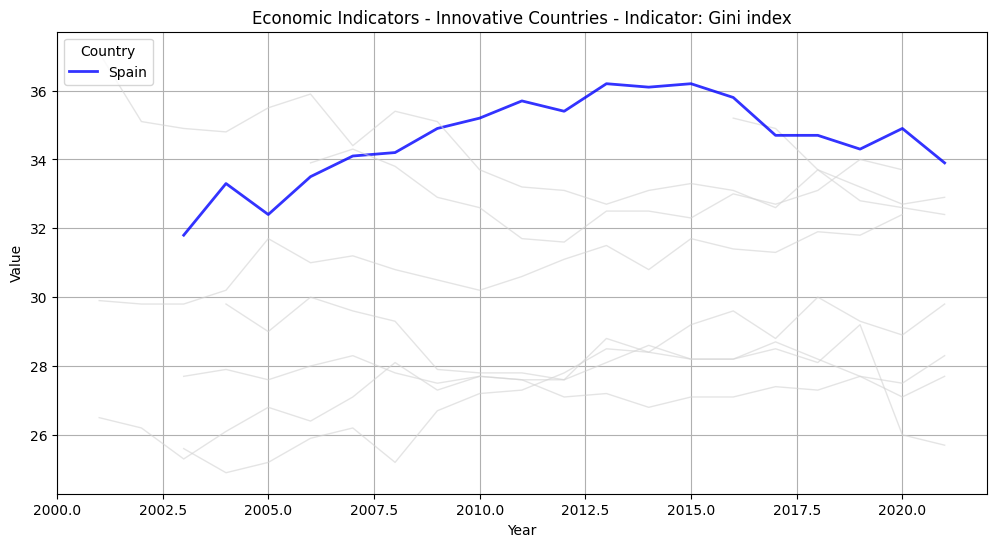

Countries: Neighbor
Analyzing indicator: Gini index, Indicator Code: SI.POV.GINI


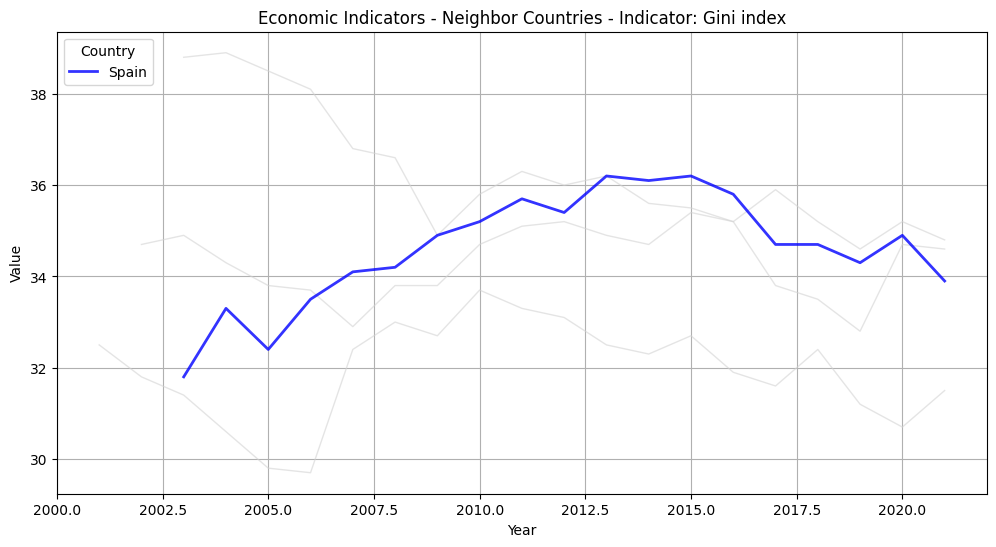

Countries: Innovative
Analyzing indicator: Inflation, consumer prices (annual %), Indicator Code: FP.CPI.TOTL.ZG


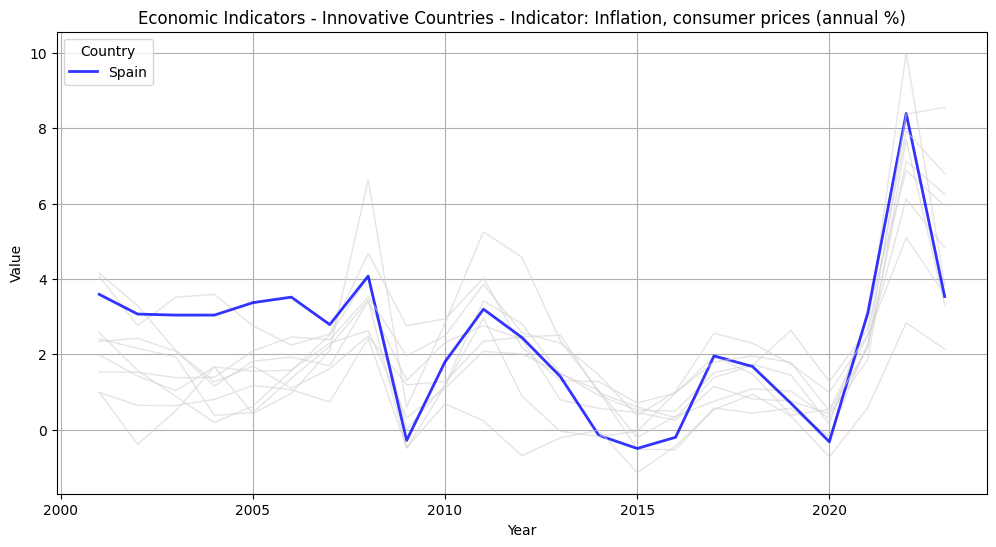

Countries: Neighbor
Analyzing indicator: Inflation, consumer prices (annual %), Indicator Code: FP.CPI.TOTL.ZG


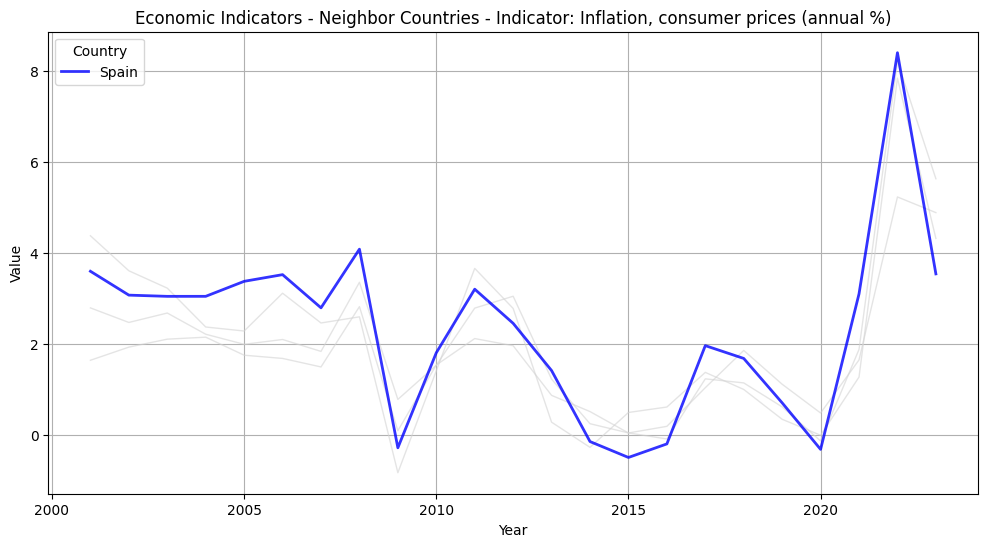

=== Analyzing Education Indicators ===
Countries: Innovative
Analyzing indicator: Government expenditure on education, total (% of government expenditure), Indicator Code: SE.XPD.TOTL.GB.ZS


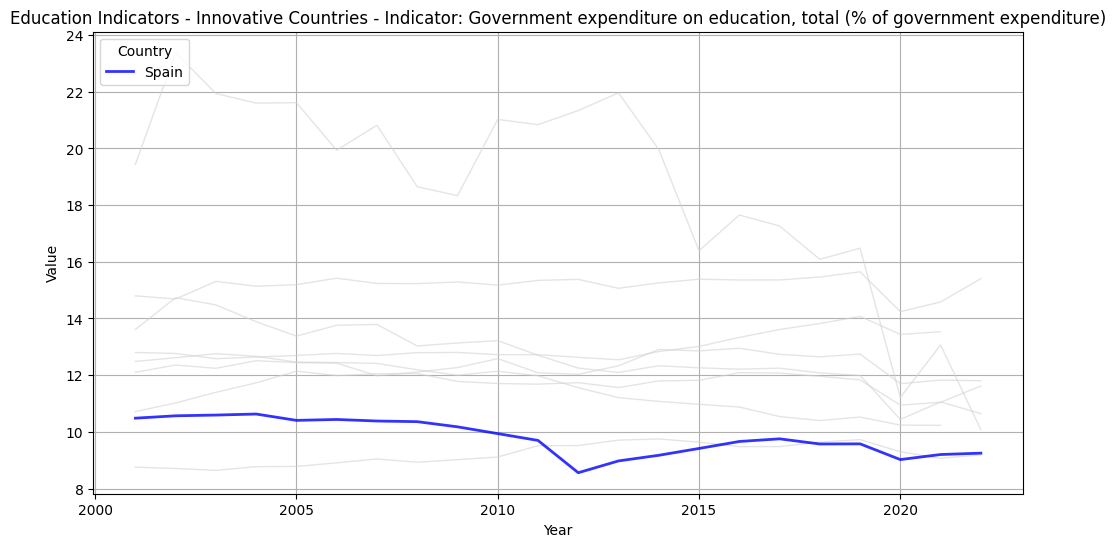

Countries: Neighbor
Analyzing indicator: Government expenditure on education, total (% of government expenditure), Indicator Code: SE.XPD.TOTL.GB.ZS


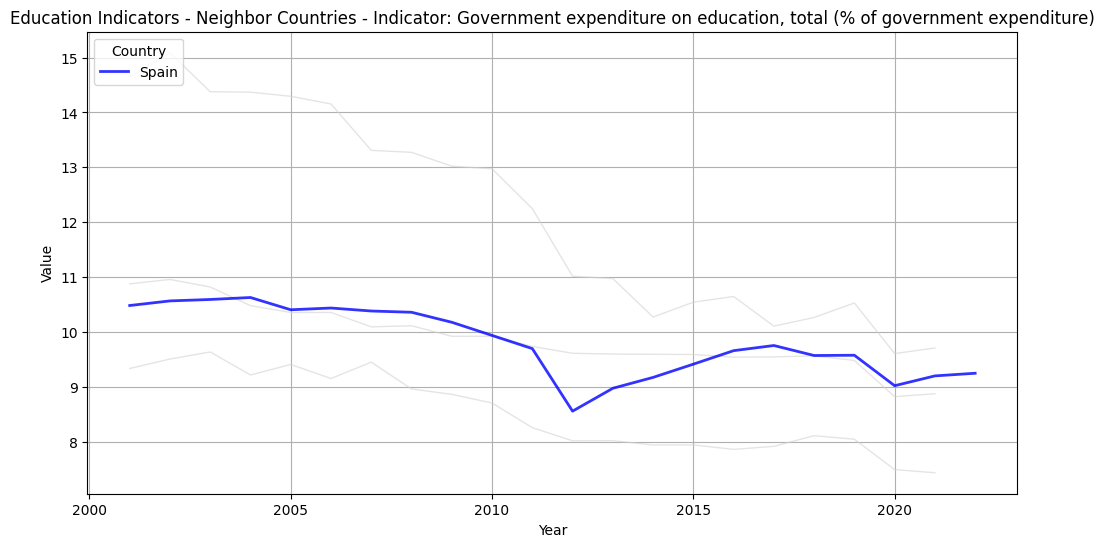

Countries: Innovative
Analyzing indicator: Government expenditure on education, total (% of GDP), Indicator Code: SE.XPD.TOTL.GD.ZS


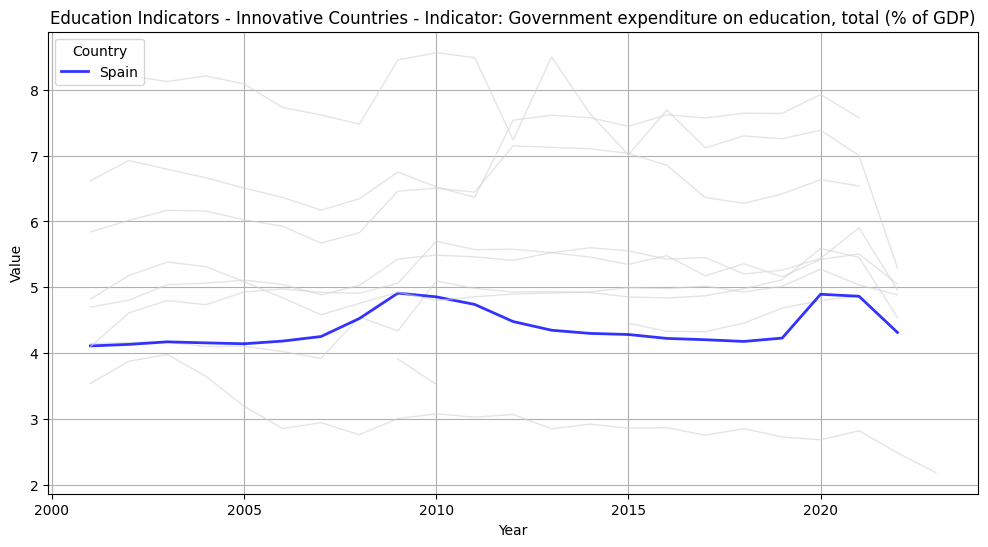

Countries: Neighbor
Analyzing indicator: Government expenditure on education, total (% of GDP), Indicator Code: SE.XPD.TOTL.GD.ZS


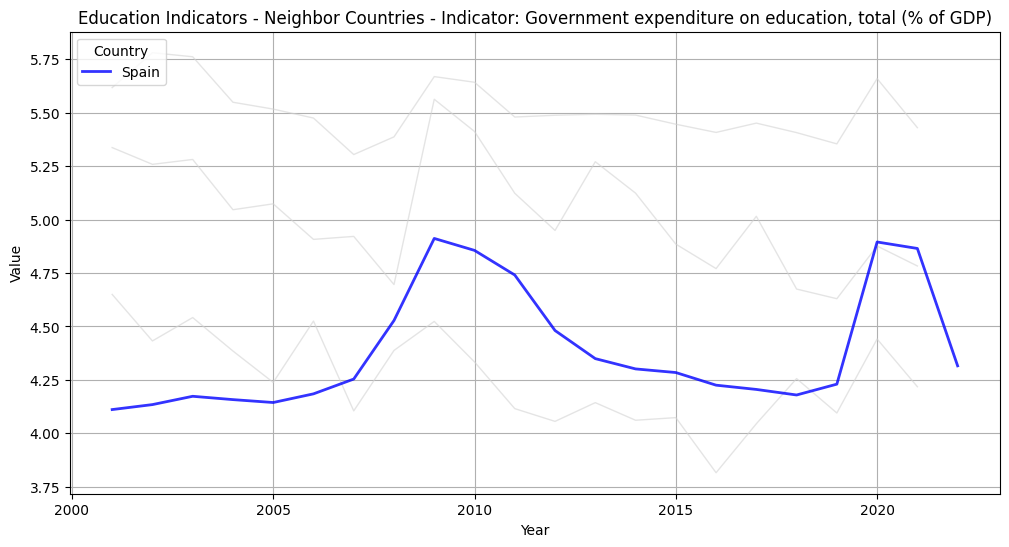

Countries: Innovative
Analyzing indicator: School enrollment, secondary (% gross), Indicator Code: SE.SEC.ENRR


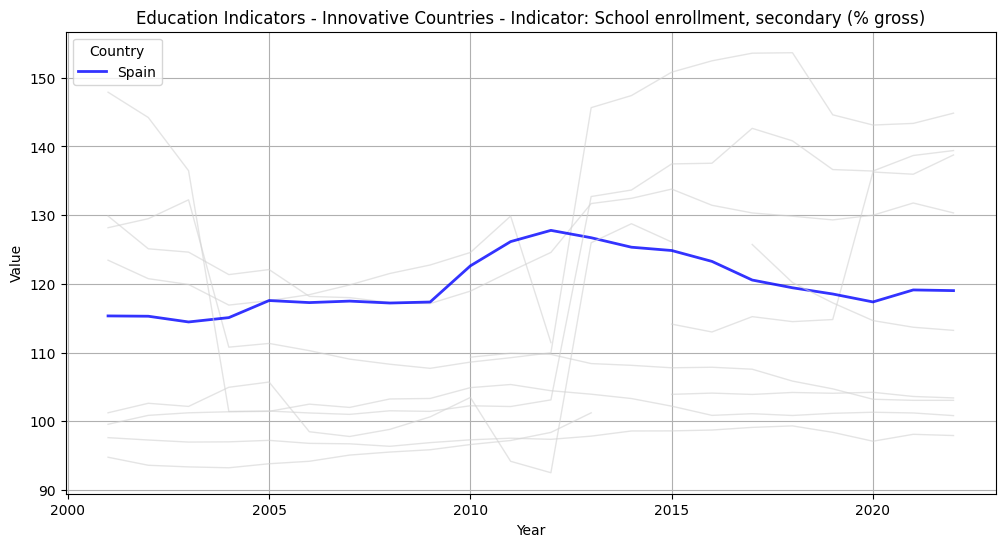

Countries: Neighbor
Analyzing indicator: School enrollment, secondary (% gross), Indicator Code: SE.SEC.ENRR


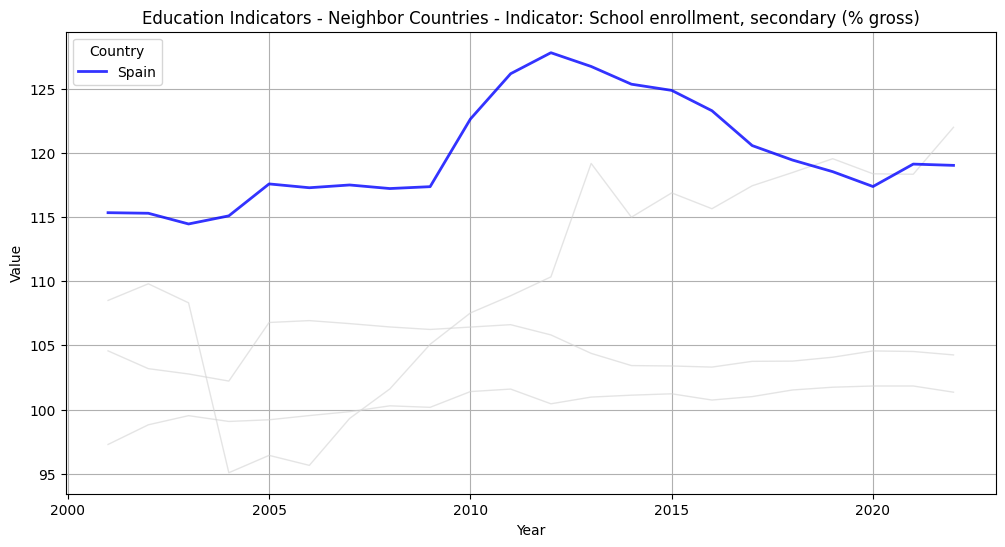

Countries: Innovative
Analyzing indicator: School enrollment, tertiary (% gross), Indicator Code: SE.TER.ENRR


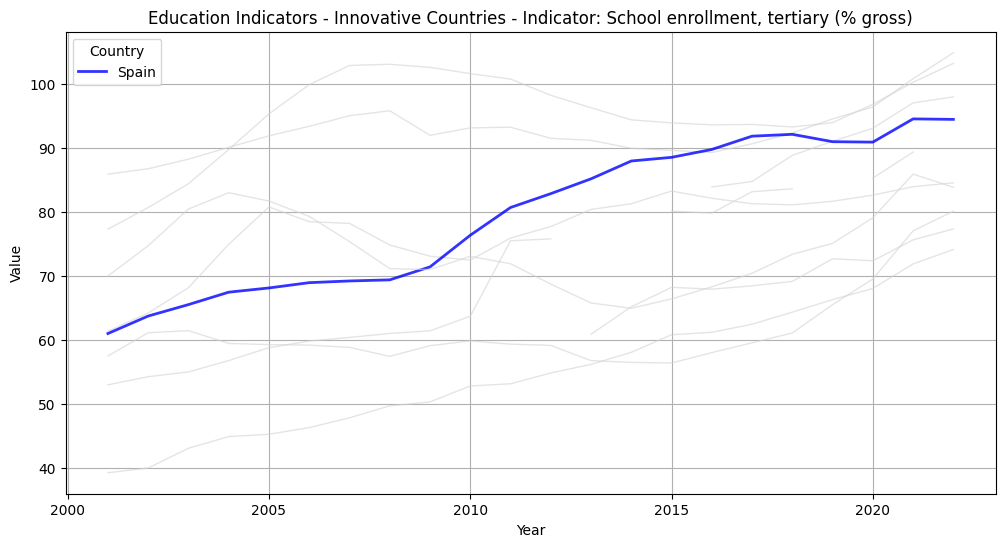

Countries: Neighbor
Analyzing indicator: School enrollment, tertiary (% gross), Indicator Code: SE.TER.ENRR


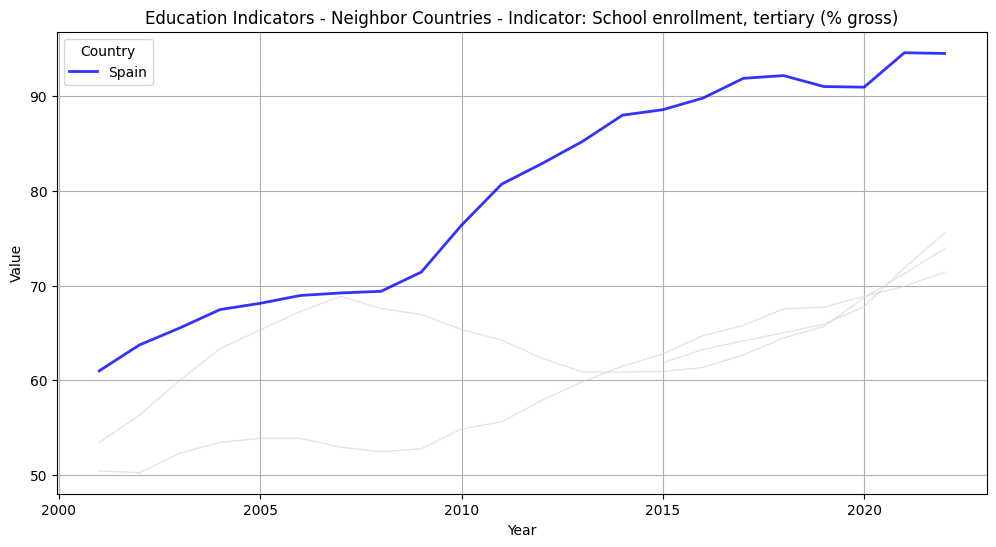

Countries: Innovative
Analyzing indicator: Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative), Indicator Code: SE.TER.CUAT.BA.ZS


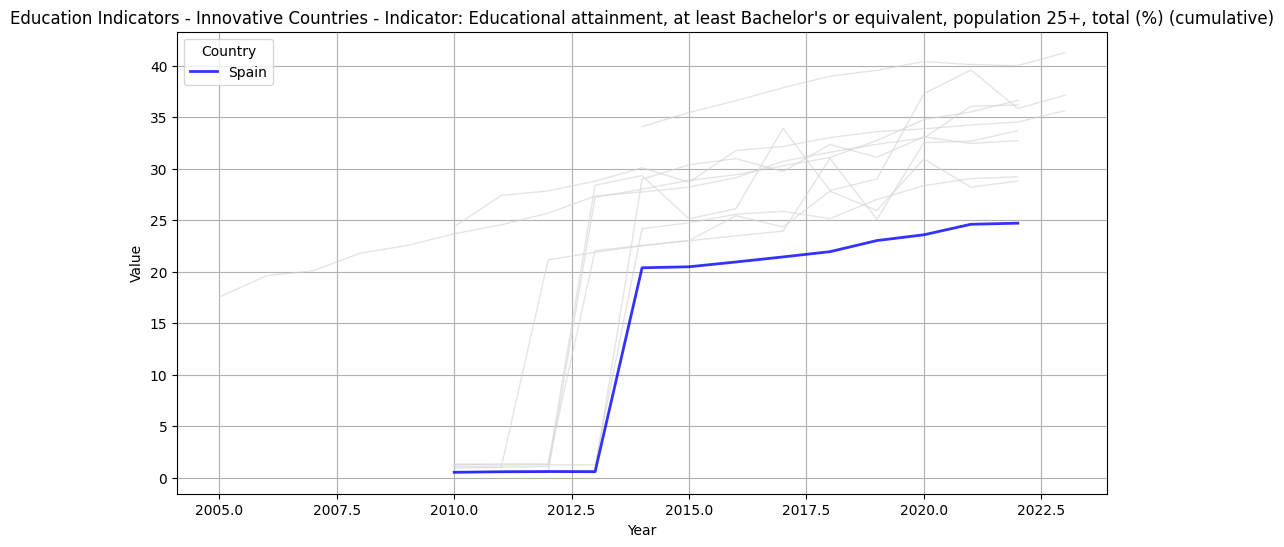

Countries: Neighbor
Analyzing indicator: Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative), Indicator Code: SE.TER.CUAT.BA.ZS


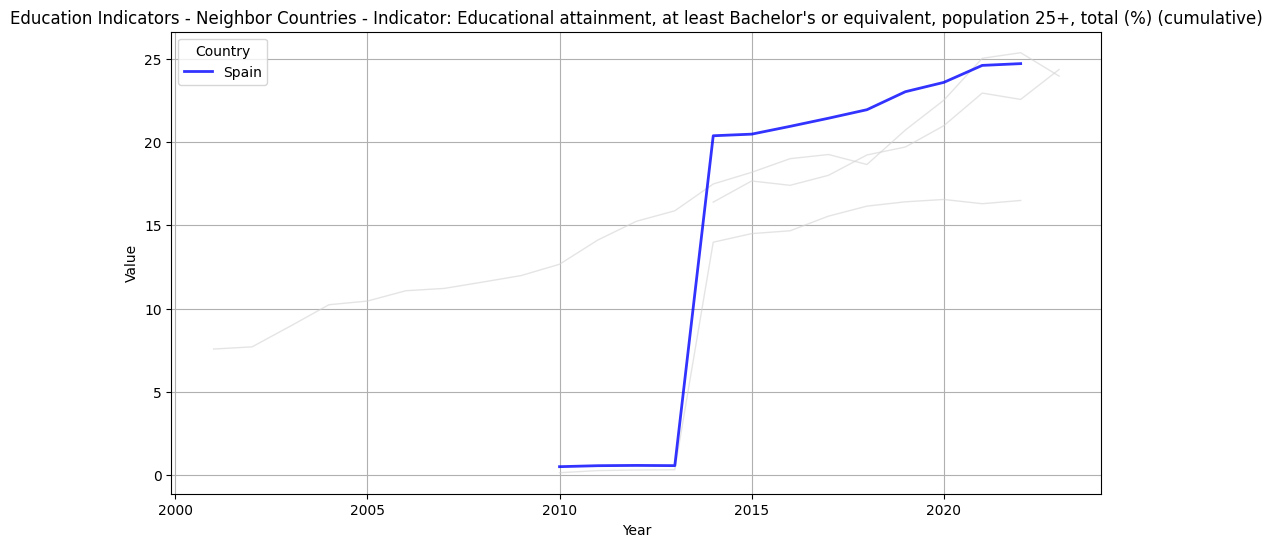

Countries: Innovative
Analyzing indicator: Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative), Indicator Code: SE.TER.CUAT.MS.ZS


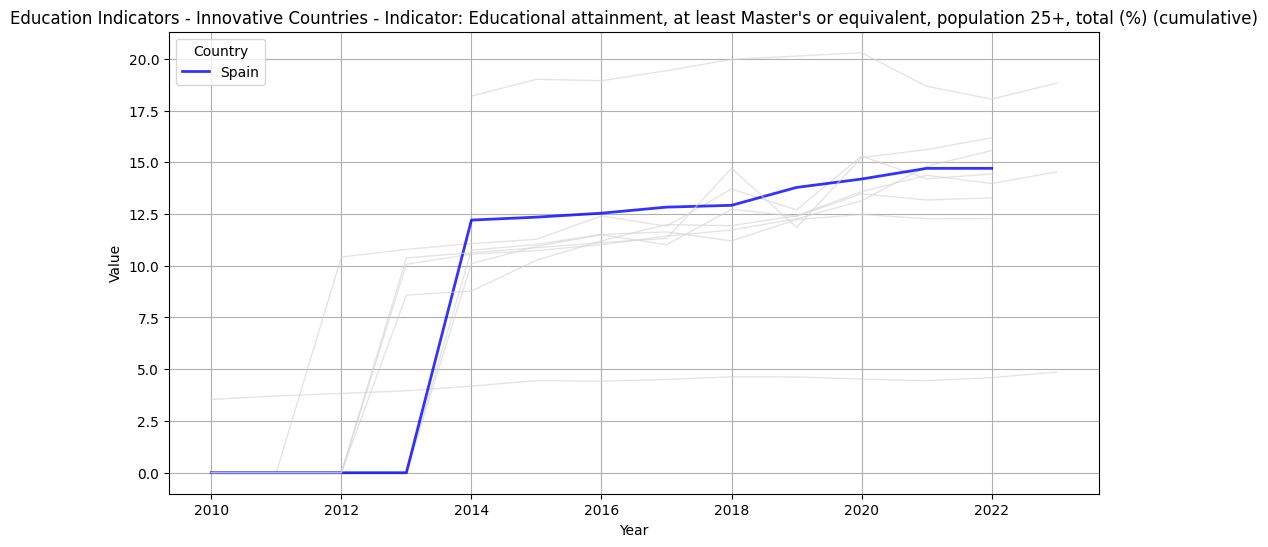

Countries: Neighbor
Analyzing indicator: Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative), Indicator Code: SE.TER.CUAT.MS.ZS


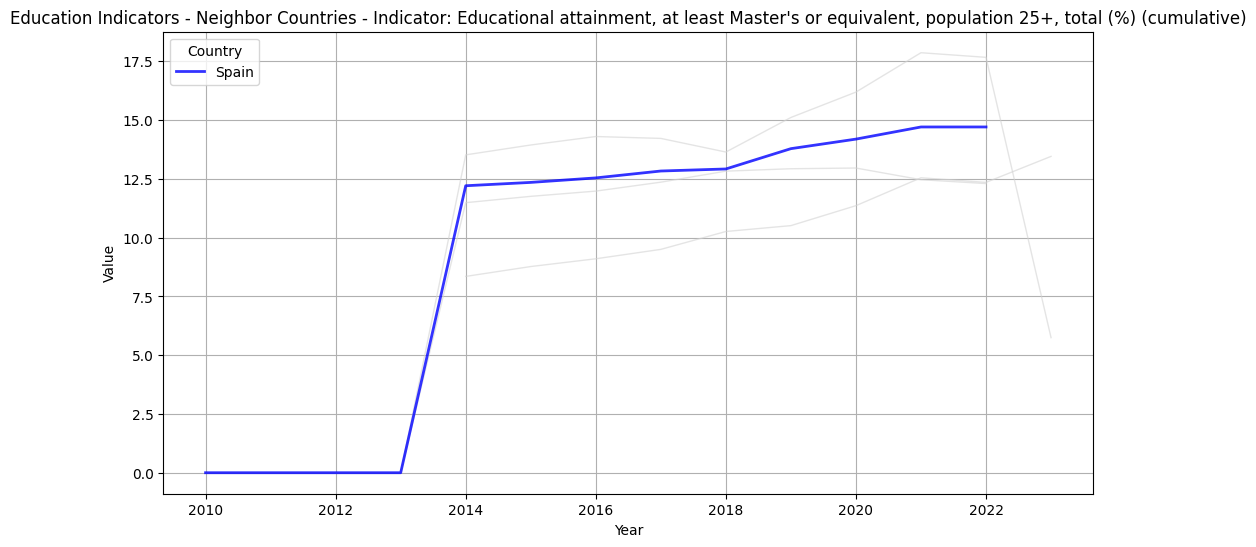

Countries: Innovative
Analyzing indicator: Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative), Indicator Code: SE.TER.CUAT.DO.ZS


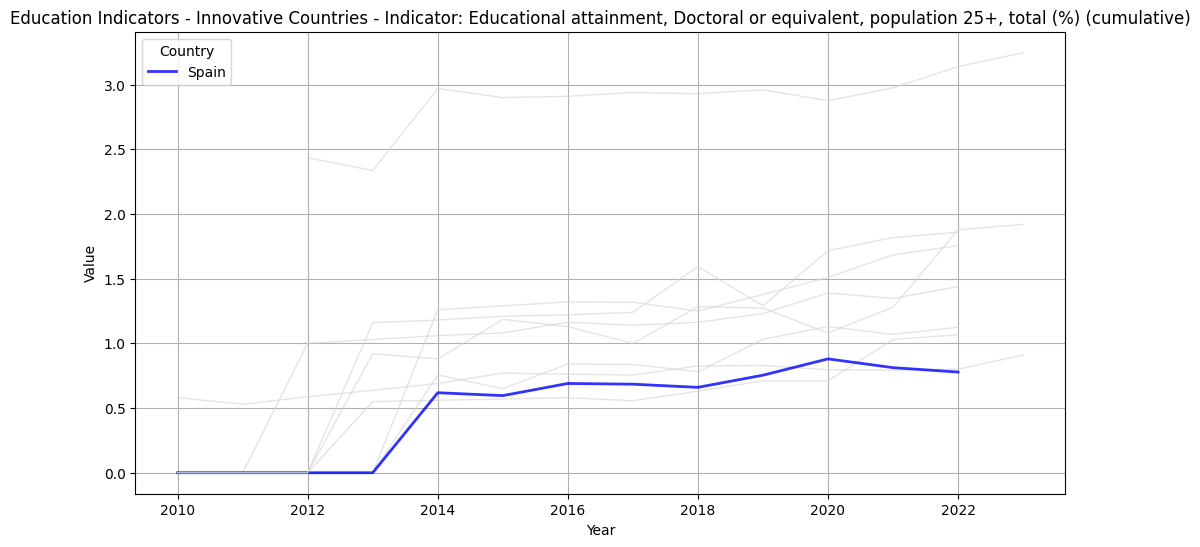

Countries: Neighbor
Analyzing indicator: Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative), Indicator Code: SE.TER.CUAT.DO.ZS


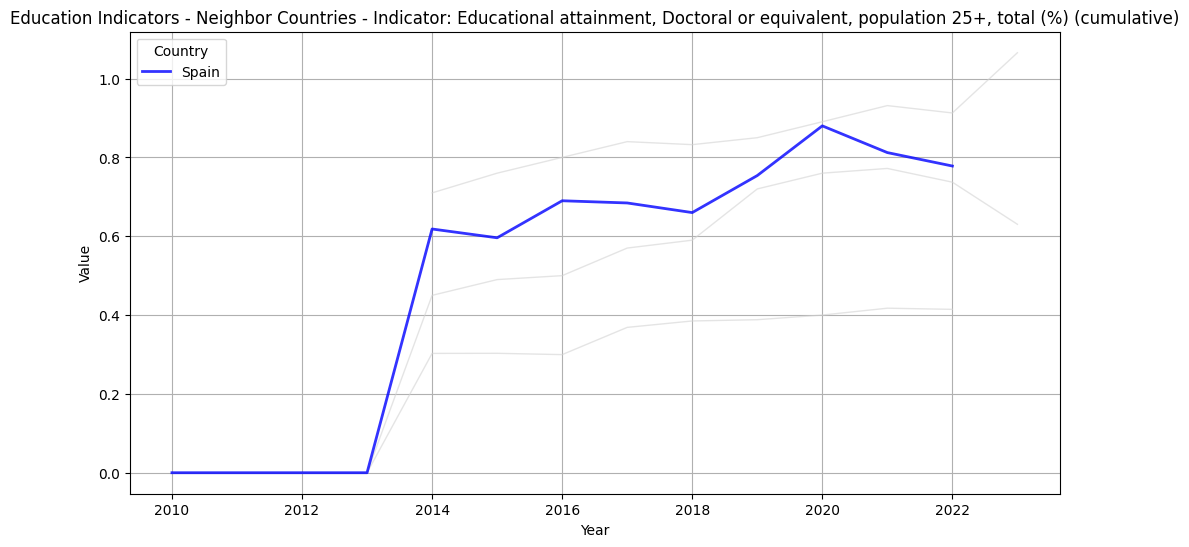

Countries: Innovative
Analyzing indicator: Pupil-teacher ratio, tertiary, Indicator Code: SE.TER.ENRL.TC.ZS


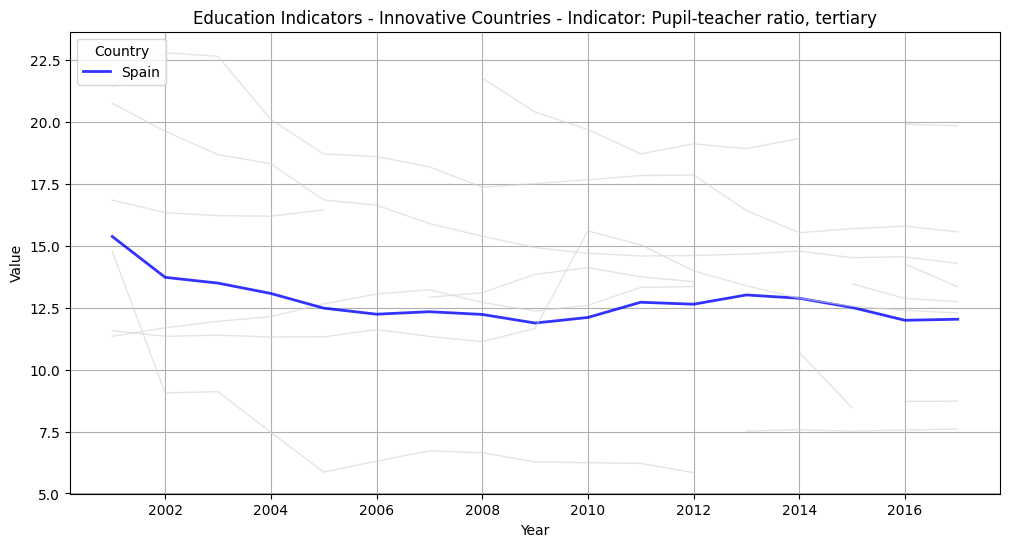

Countries: Neighbor
Analyzing indicator: Pupil-teacher ratio, tertiary, Indicator Code: SE.TER.ENRL.TC.ZS


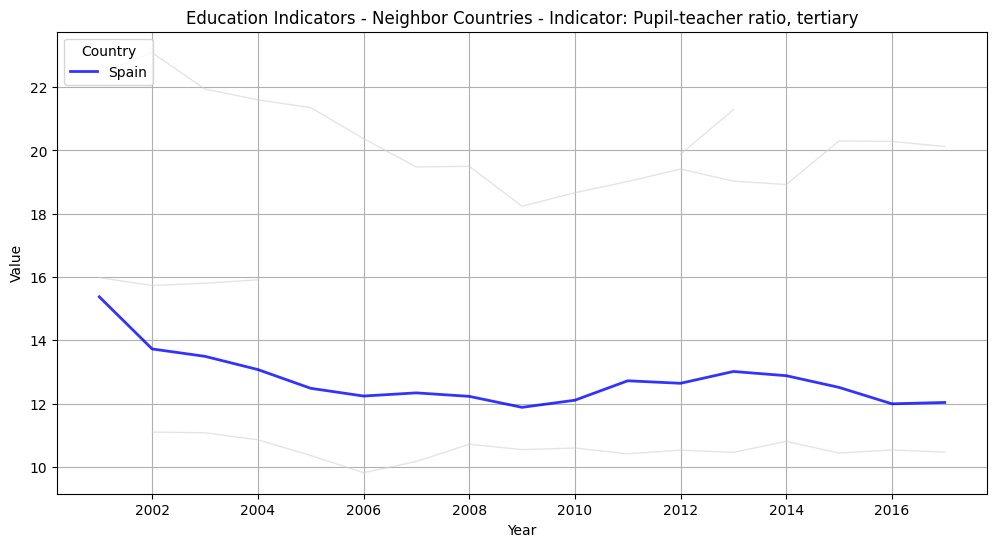

Countries: Innovative
Analyzing indicator: Current education expenditure, primary (% of total expenditure in primary public institutions), Indicator Code: SE.XPD.CPRM.ZS


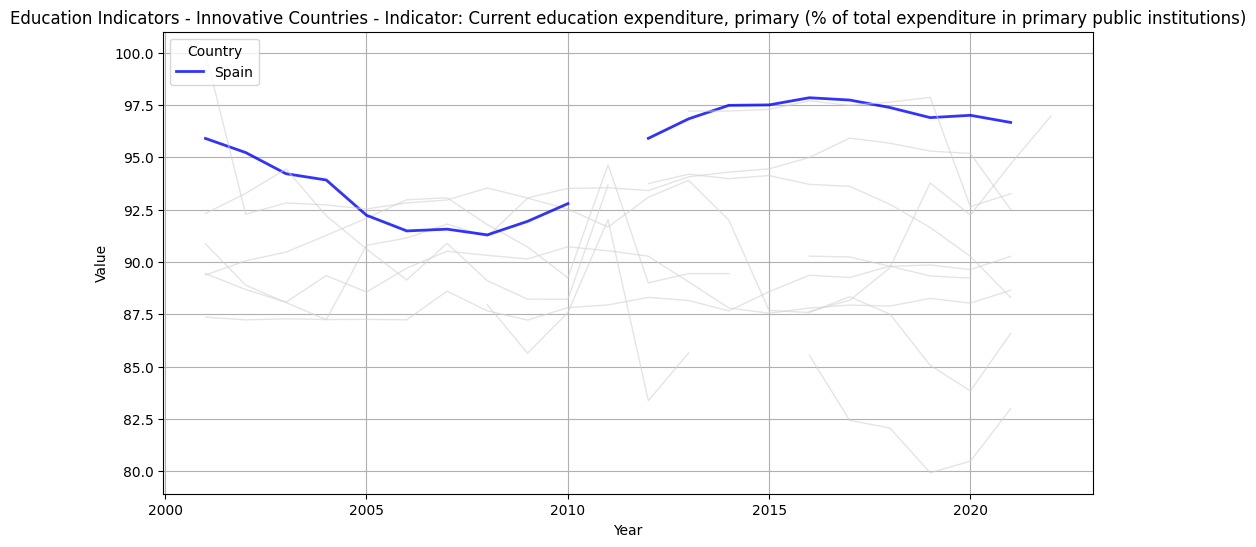

Countries: Neighbor
Analyzing indicator: Current education expenditure, primary (% of total expenditure in primary public institutions), Indicator Code: SE.XPD.CPRM.ZS


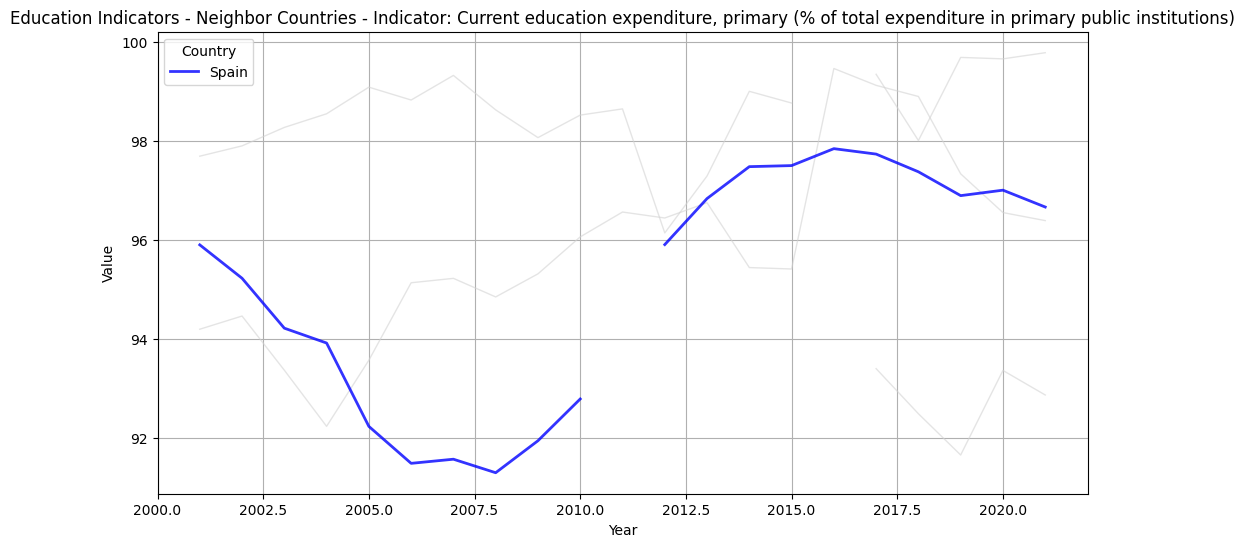

Countries: Innovative
Analyzing indicator: Current education expenditure, secondary (% of total expenditure in secondary public institutions), Indicator Code: SE.XPD.CSEC.ZS


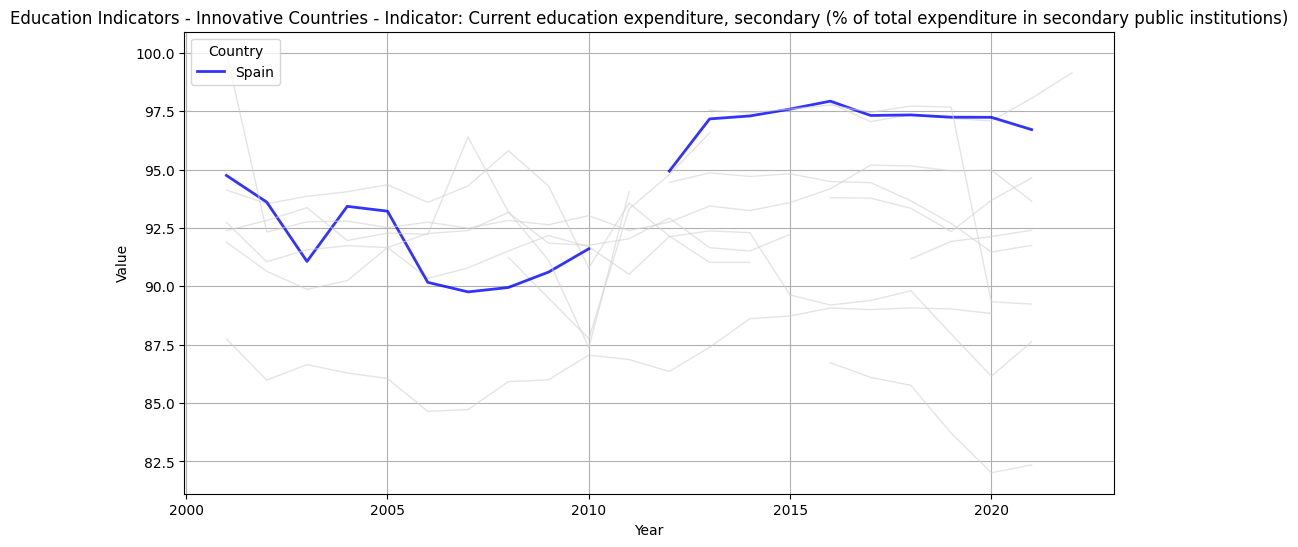

Countries: Neighbor
Analyzing indicator: Current education expenditure, secondary (% of total expenditure in secondary public institutions), Indicator Code: SE.XPD.CSEC.ZS


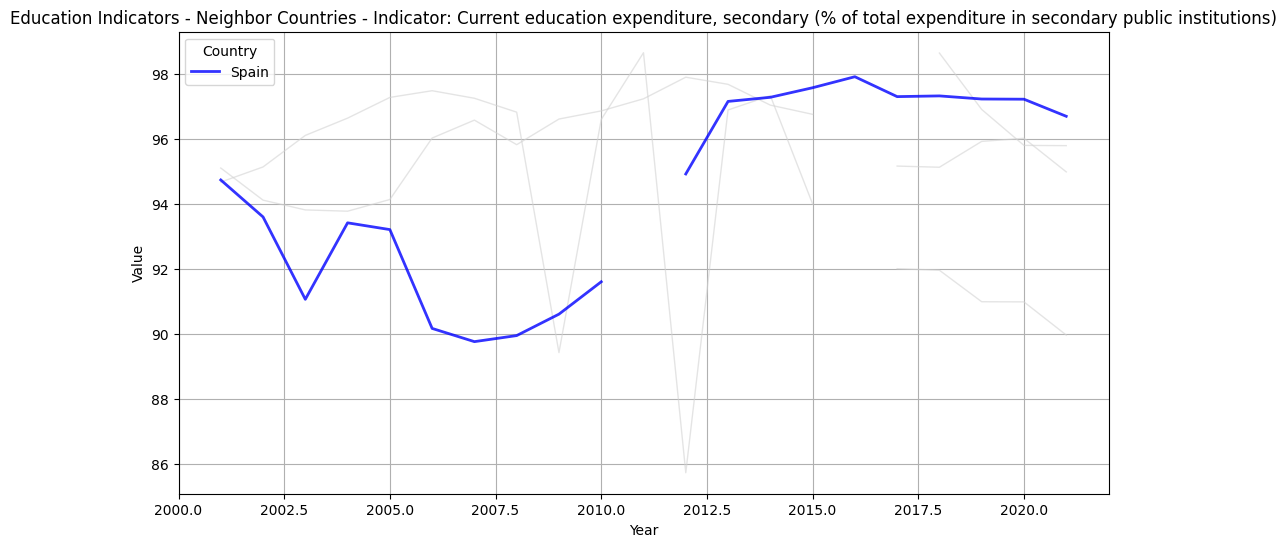

Countries: Innovative
Analyzing indicator: Current education expenditure, tertiary (% of total expenditure in tertiary public institutions), Indicator Code: SE.XPD.CTER.ZS


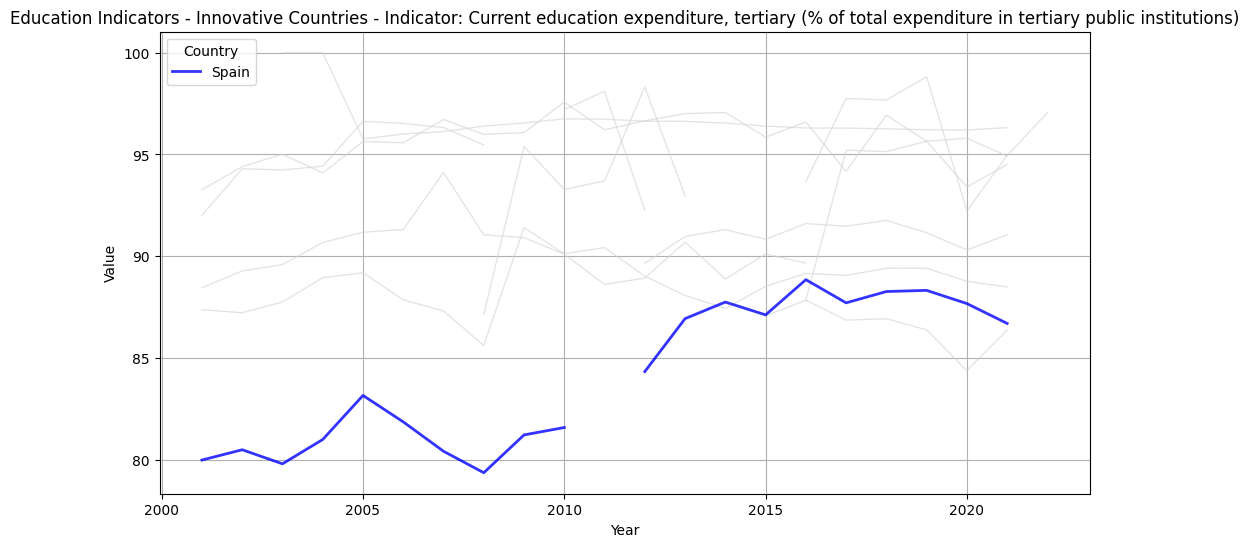

Countries: Neighbor
Analyzing indicator: Current education expenditure, tertiary (% of total expenditure in tertiary public institutions), Indicator Code: SE.XPD.CTER.ZS


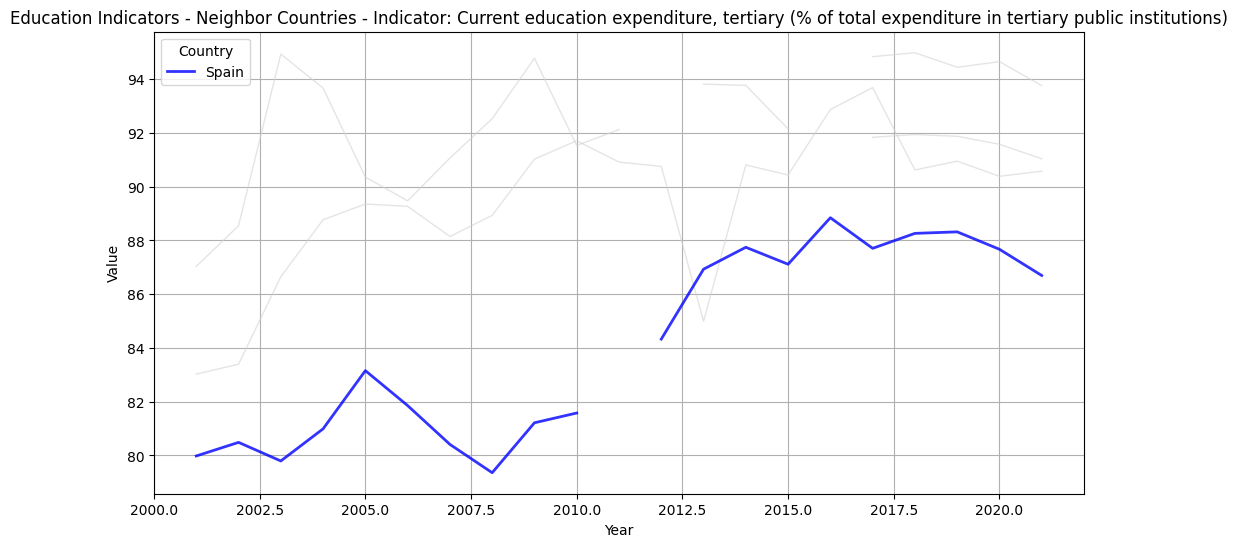

Countries: Innovative
Analyzing indicator: Government expenditure per student, primary (% of GDP per capita), Indicator Code: SE.XPD.PRIM.PC.ZS


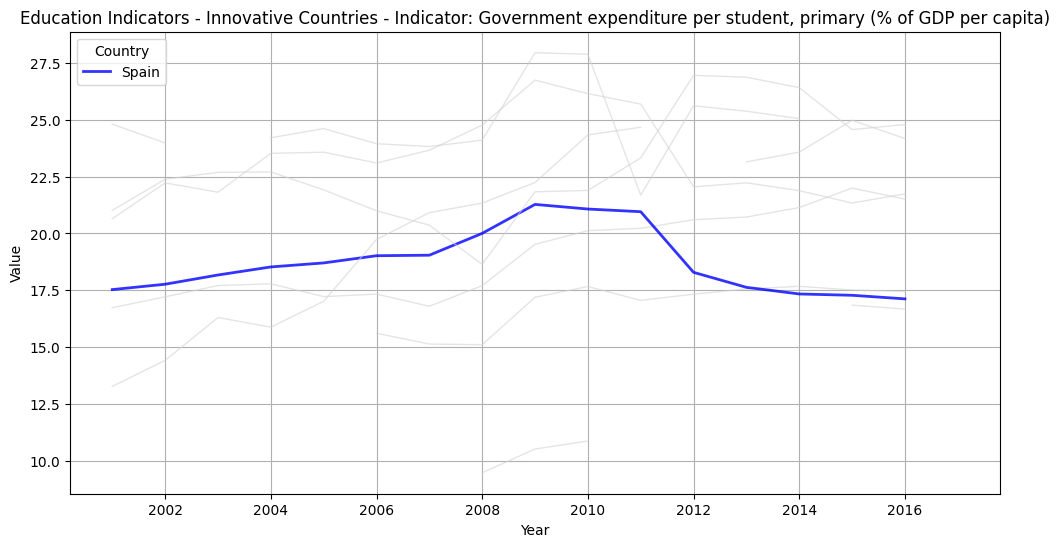

Countries: Neighbor
Analyzing indicator: Government expenditure per student, primary (% of GDP per capita), Indicator Code: SE.XPD.PRIM.PC.ZS


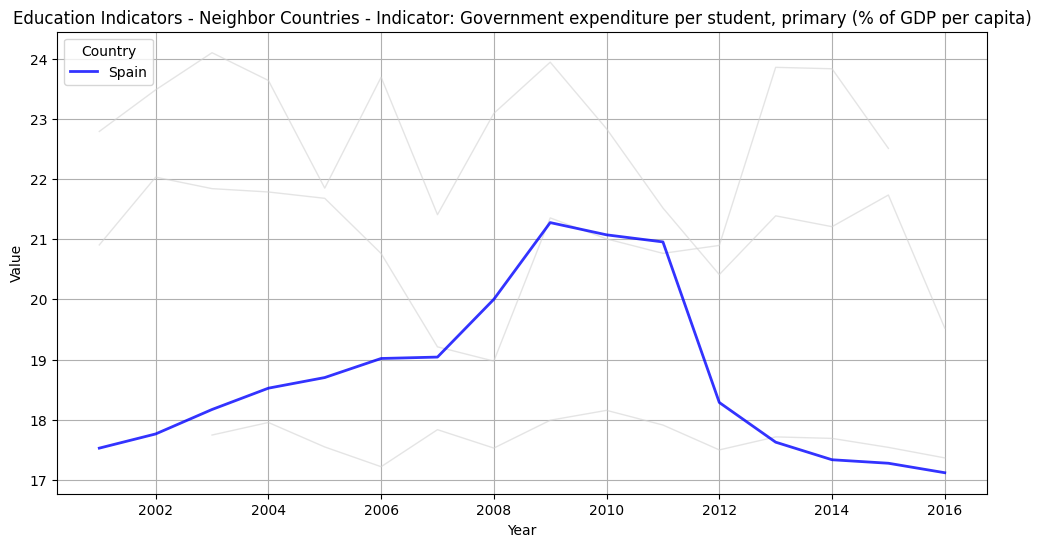

Countries: Innovative
Analyzing indicator: Government expenditure per student, secondary (% of GDP per capita), Indicator Code: SE.XPD.SECO.PC.ZS


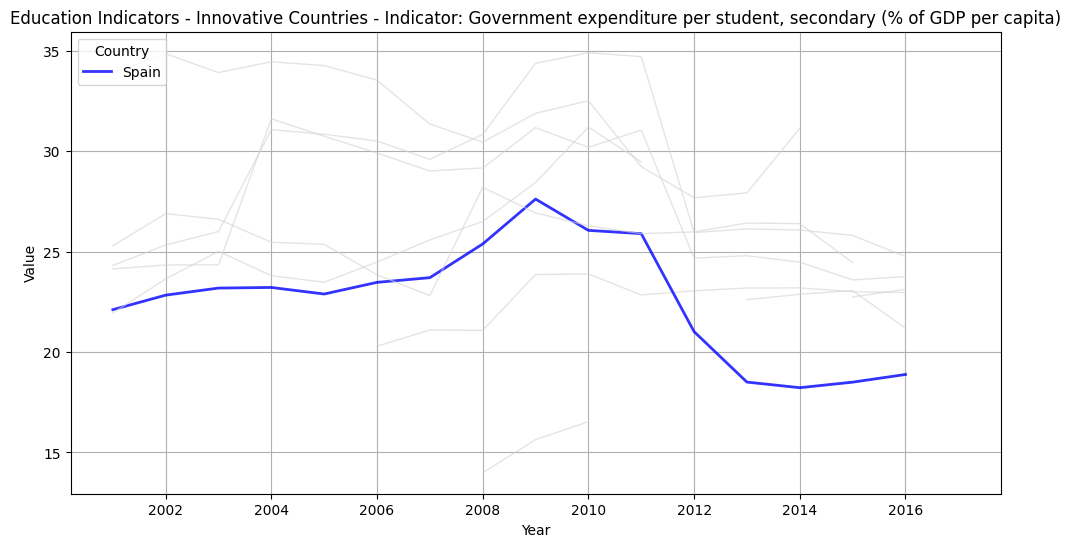

Countries: Neighbor
Analyzing indicator: Government expenditure per student, secondary (% of GDP per capita), Indicator Code: SE.XPD.SECO.PC.ZS


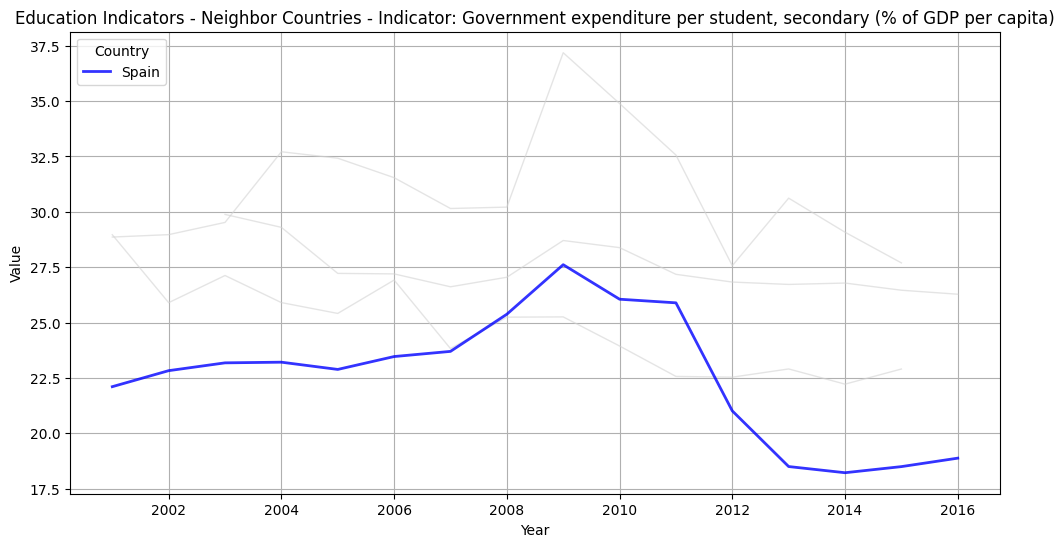

Countries: Innovative
Analyzing indicator: Government expenditure per student, tertiary (% of GDP per capita), Indicator Code: SE.XPD.TERT.PC.ZS


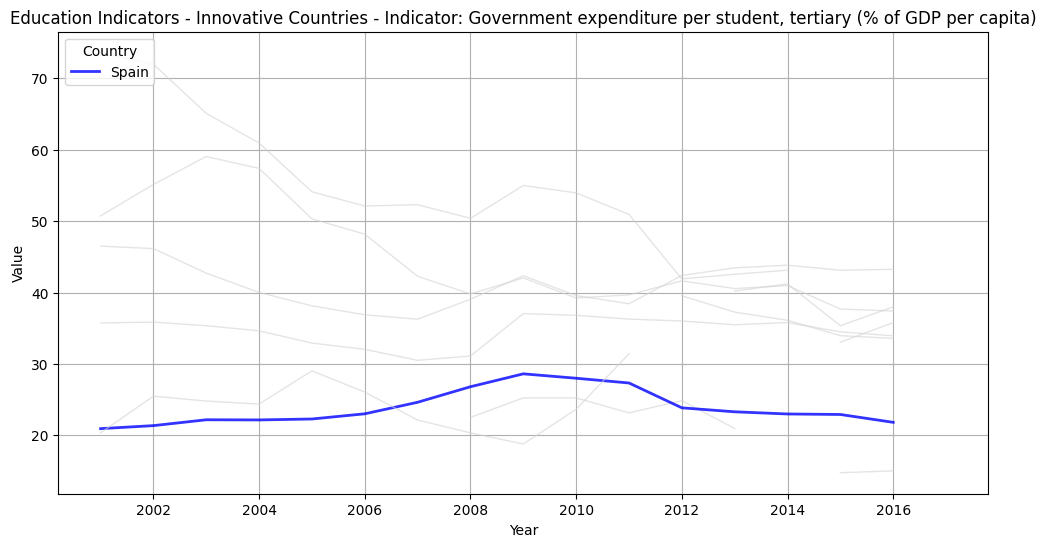

Countries: Neighbor
Analyzing indicator: Government expenditure per student, tertiary (% of GDP per capita), Indicator Code: SE.XPD.TERT.PC.ZS


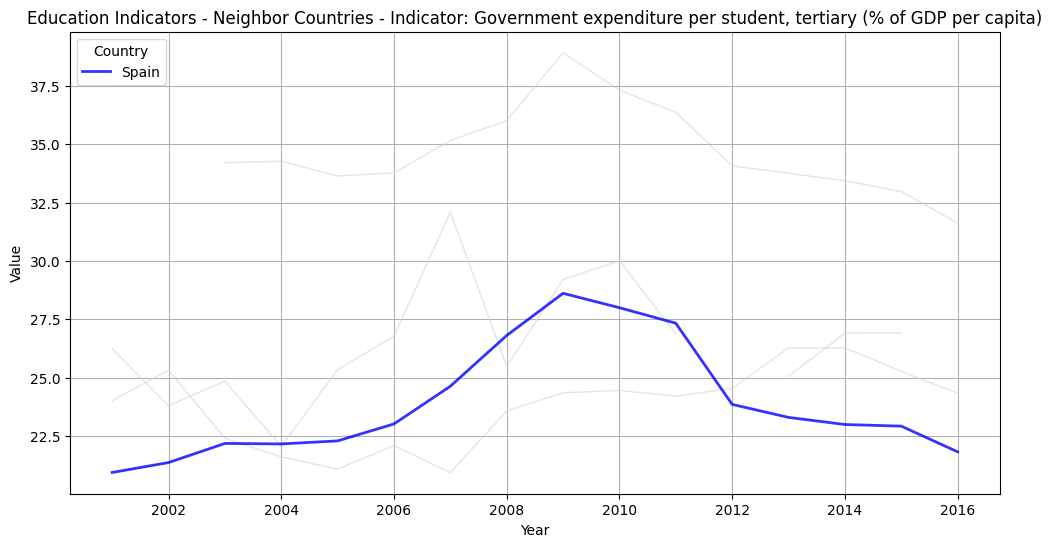

=== Analyzing Energy Indicators ===
Countries: Innovative
Analyzing indicator: Energy use (kg of oil equivalent per capita), Indicator Code: EG.USE.PCAP.KG.OE


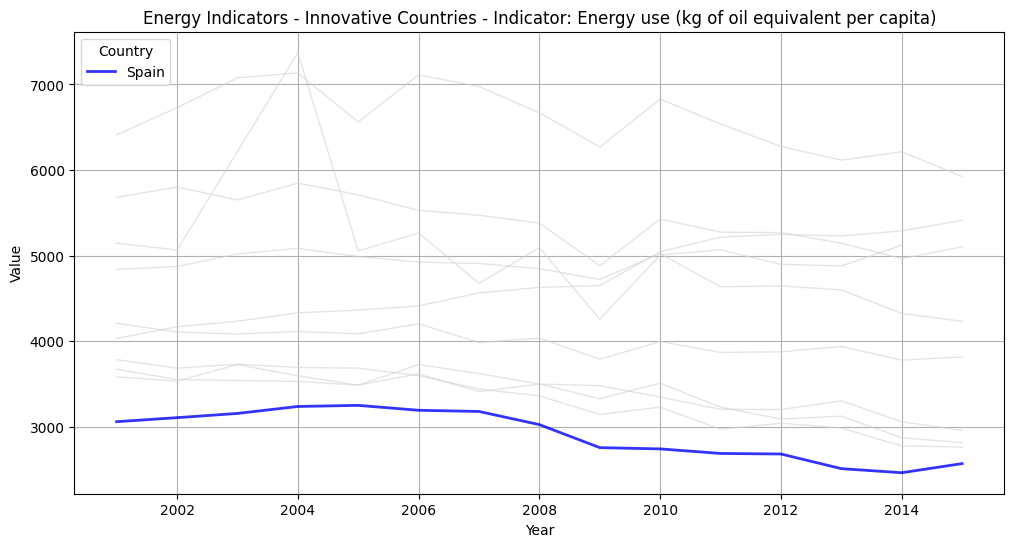

Countries: Neighbor
Analyzing indicator: Energy use (kg of oil equivalent per capita), Indicator Code: EG.USE.PCAP.KG.OE


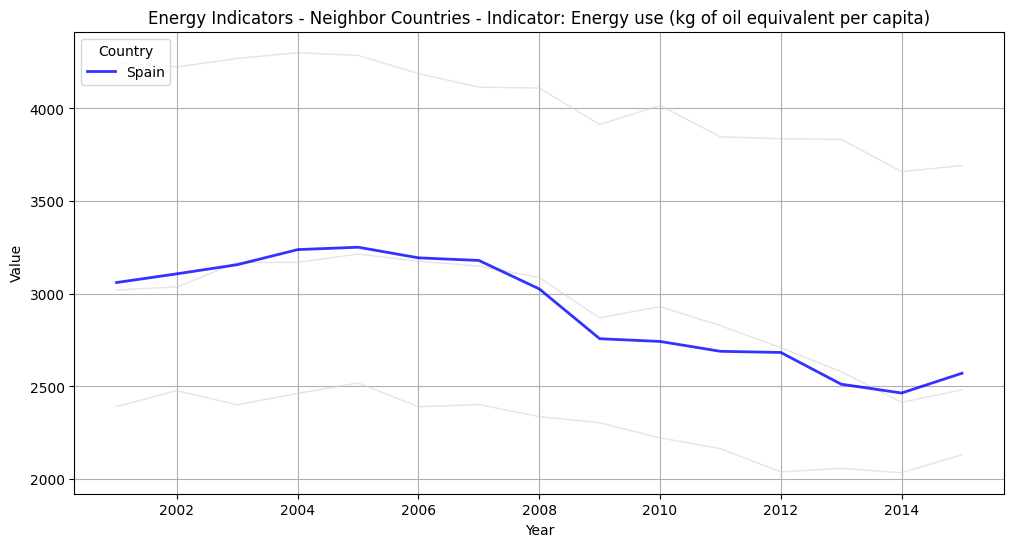

Countries: Innovative
Analyzing indicator: Electric power consumption (kWh per capita), Indicator Code: EG.USE.ELEC.KH.PC


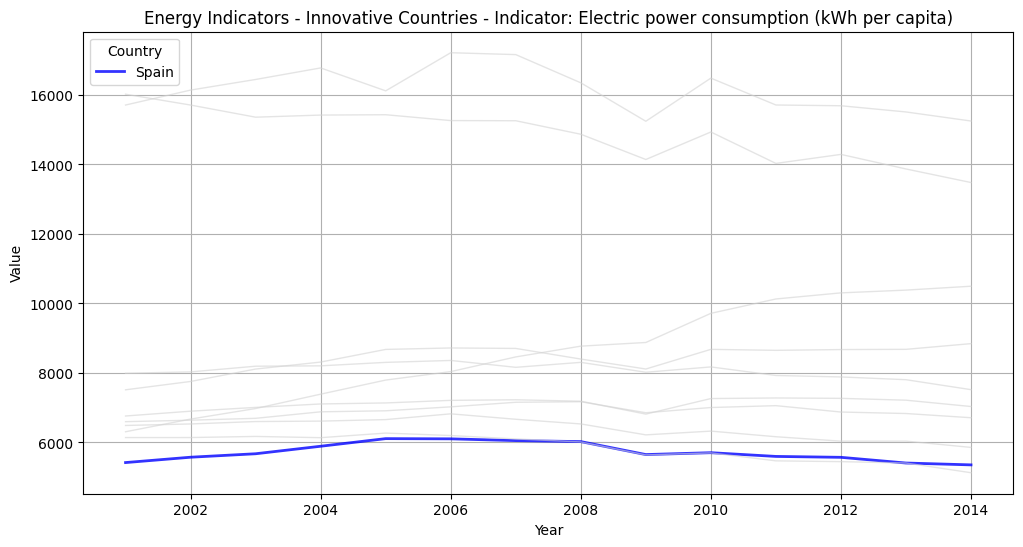

Countries: Neighbor
Analyzing indicator: Electric power consumption (kWh per capita), Indicator Code: EG.USE.ELEC.KH.PC


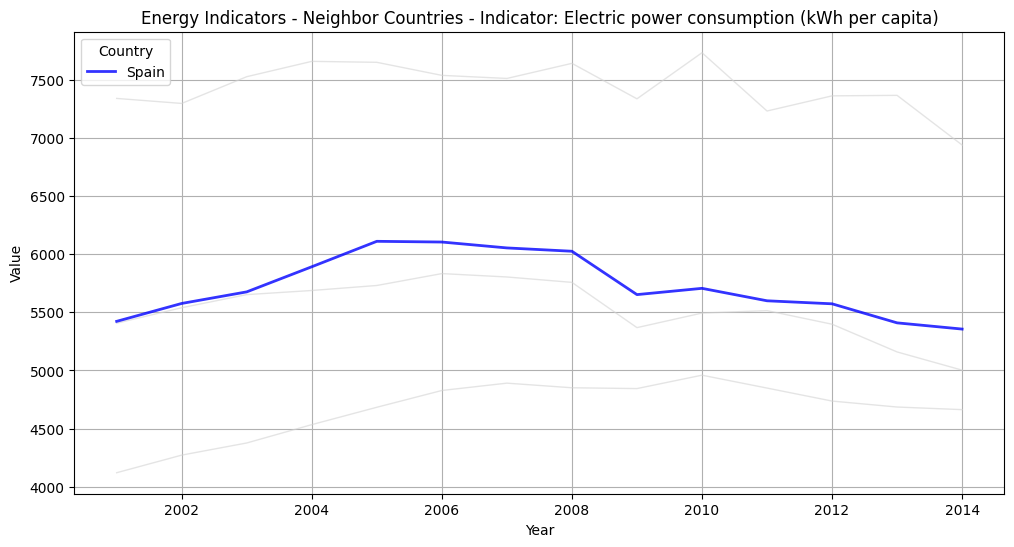

Countries: Innovative
Analyzing indicator: Electricity production from nuclear sources (% of total), Indicator Code: EG.ELC.NUCL.ZS


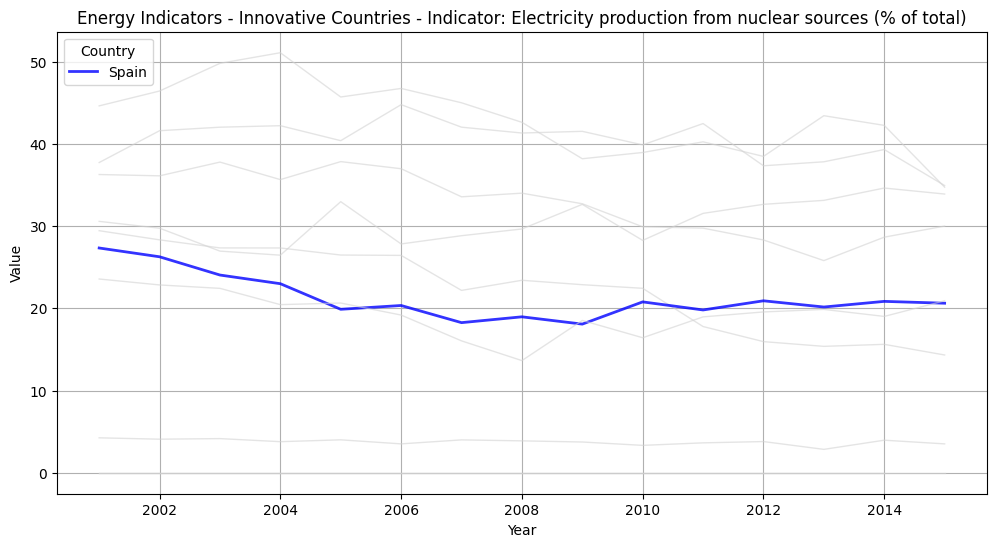

Countries: Neighbor
Analyzing indicator: Electricity production from nuclear sources (% of total), Indicator Code: EG.ELC.NUCL.ZS


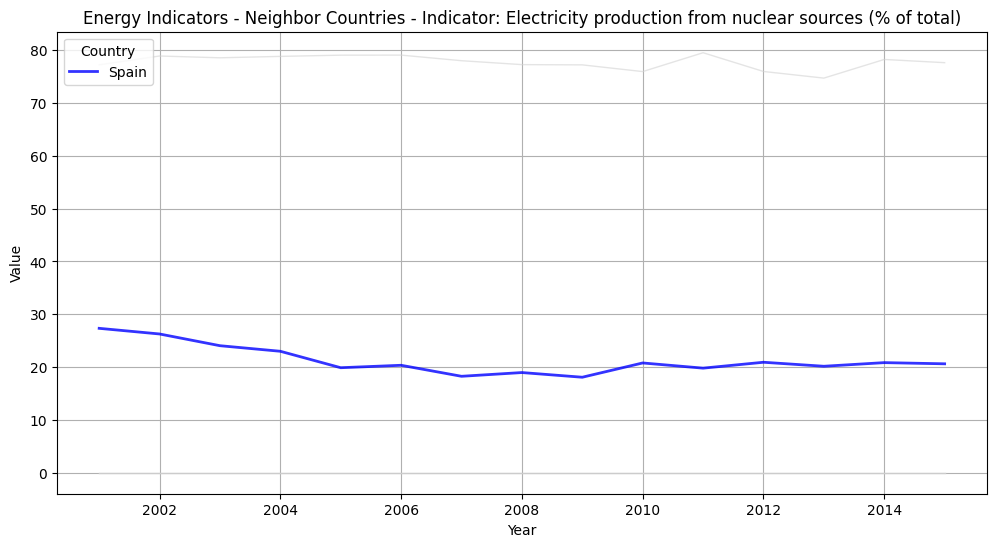

Countries: Innovative
Analyzing indicator: Renewable electricity output (% of total electricity output), Indicator Code: EG.ELC.RNEW.ZS


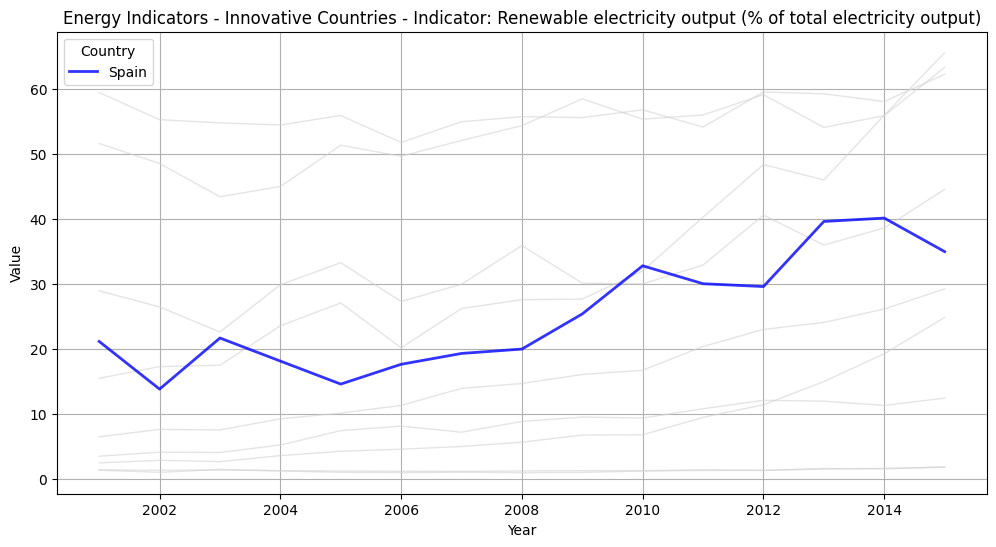

Countries: Neighbor
Analyzing indicator: Renewable electricity output (% of total electricity output), Indicator Code: EG.ELC.RNEW.ZS


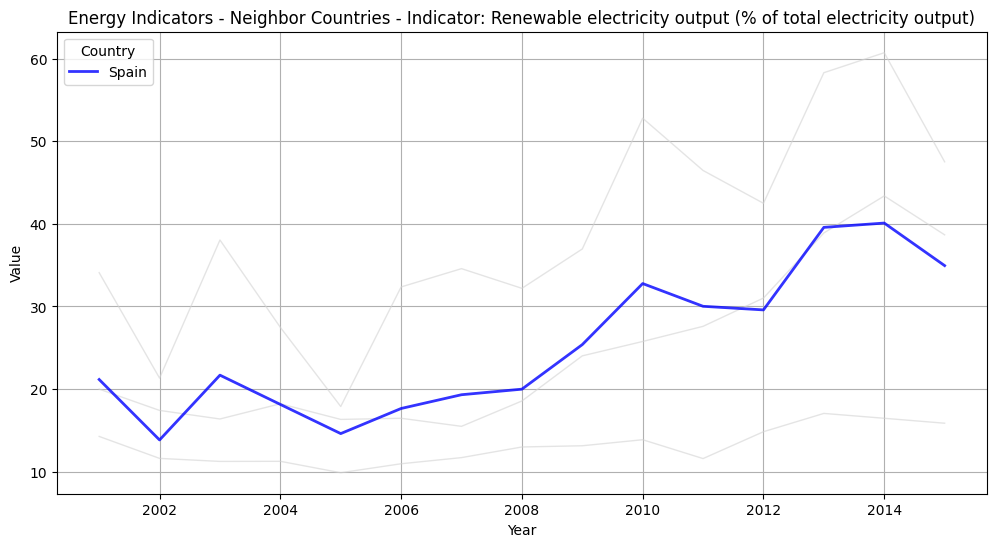

=== Analyzing Research & Development Indicators ===
Countries: Innovative
Analyzing indicator: Research and development expenditure (% of GDP), Indicator Code: GB.XPD.RSDV.GD.ZS


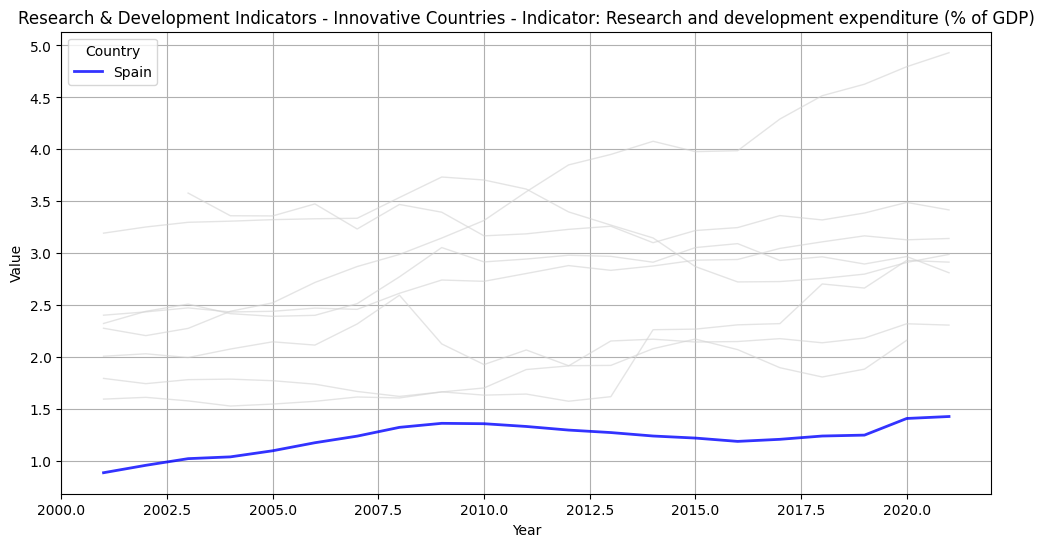

Countries: Neighbor
Analyzing indicator: Research and development expenditure (% of GDP), Indicator Code: GB.XPD.RSDV.GD.ZS


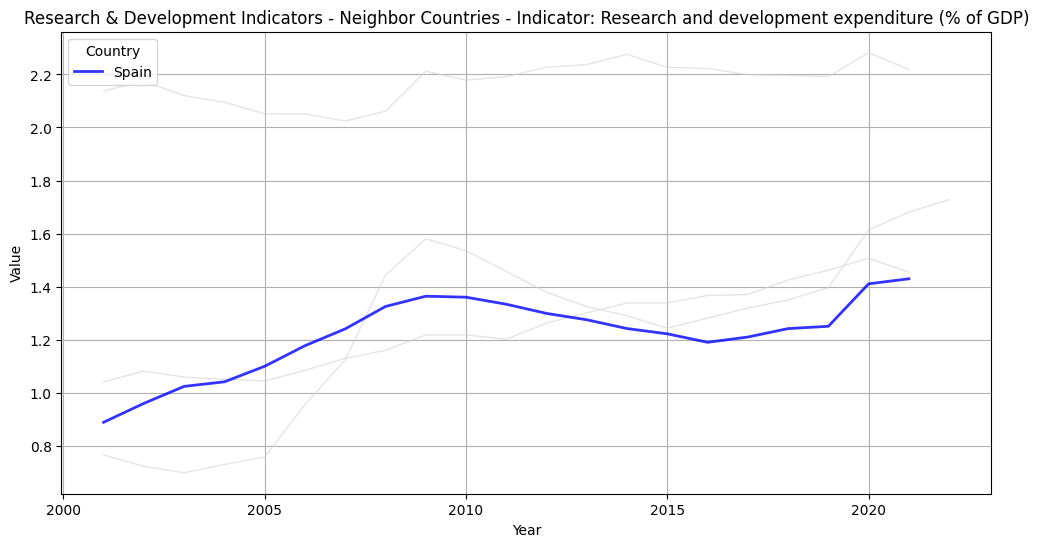

Countries: Innovative
Analyzing indicator: Researchers in R&D (per million people), Indicator Code: SP.POP.SCIE.RD.P6


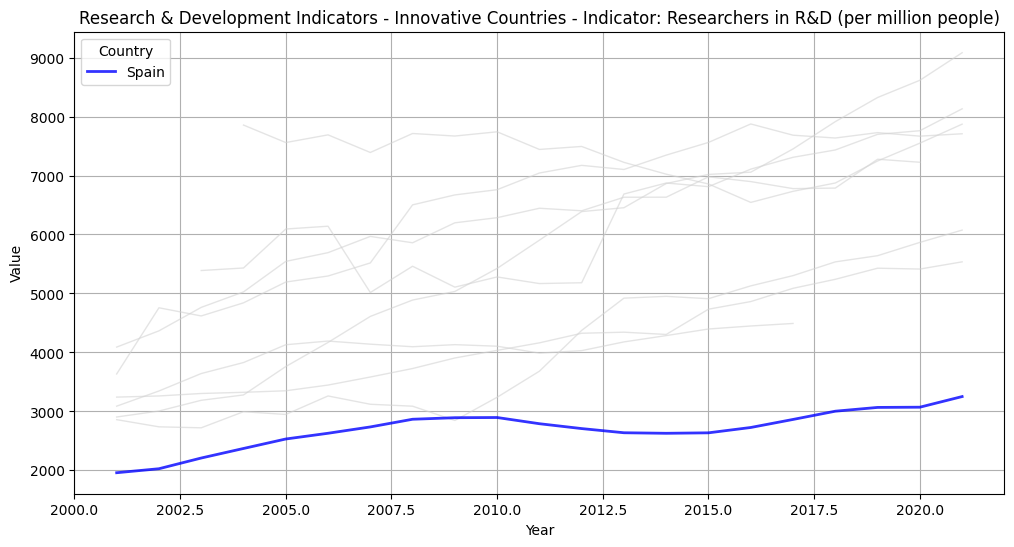

Countries: Neighbor
Analyzing indicator: Researchers in R&D (per million people), Indicator Code: SP.POP.SCIE.RD.P6


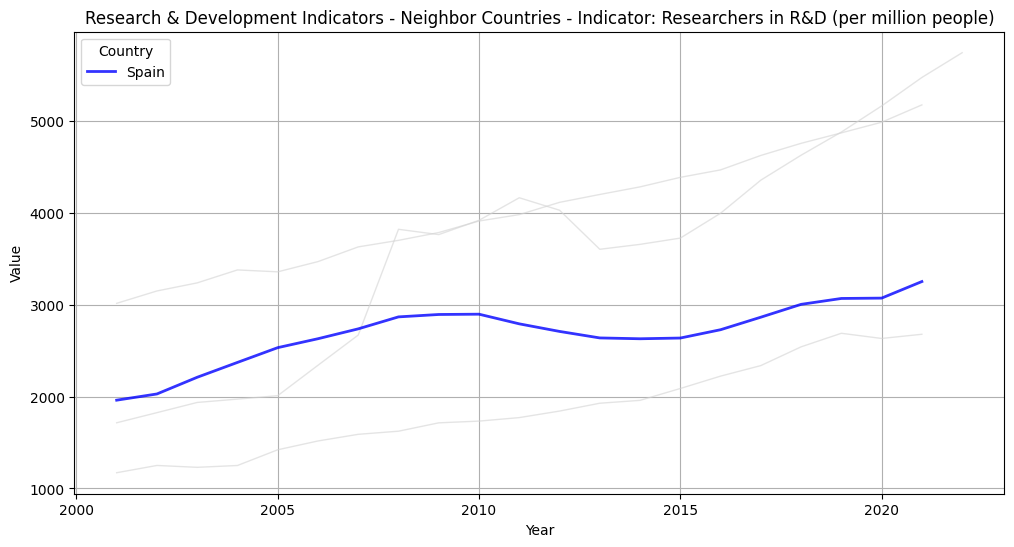

Countries: Innovative
Analyzing indicator: Technicians in R&D (per million people), Indicator Code: SP.POP.TECH.RD.P6


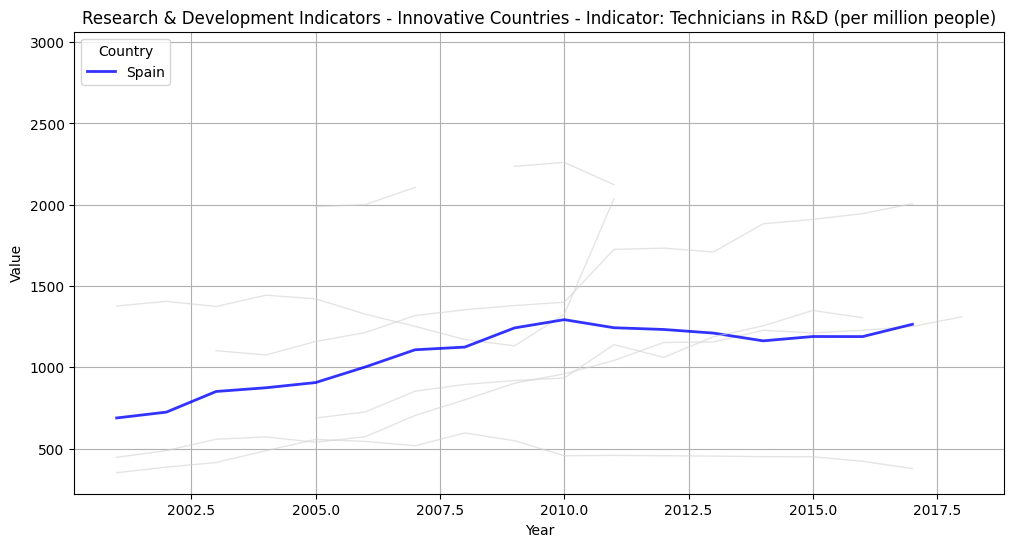

Countries: Neighbor
Analyzing indicator: Technicians in R&D (per million people), Indicator Code: SP.POP.TECH.RD.P6


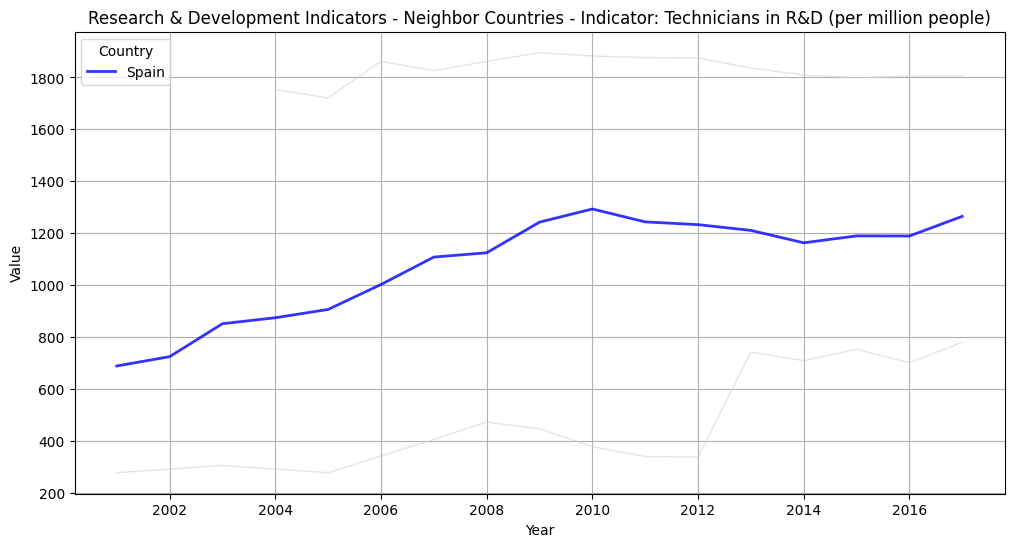

Countries: Innovative
Analyzing indicator: Patent applications, residents, Indicator Code: IP.PAT.RESD


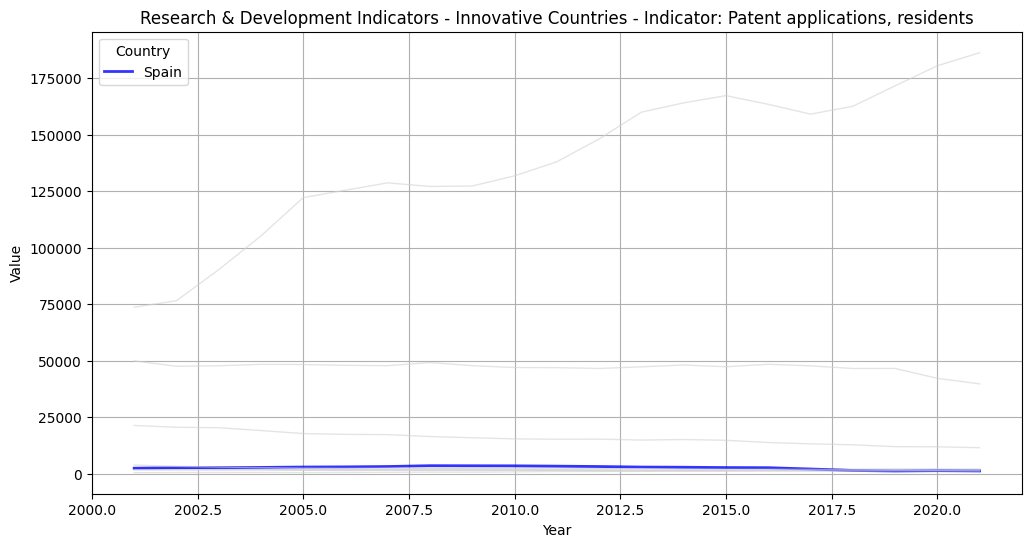

Countries: Neighbor
Analyzing indicator: Patent applications, residents, Indicator Code: IP.PAT.RESD


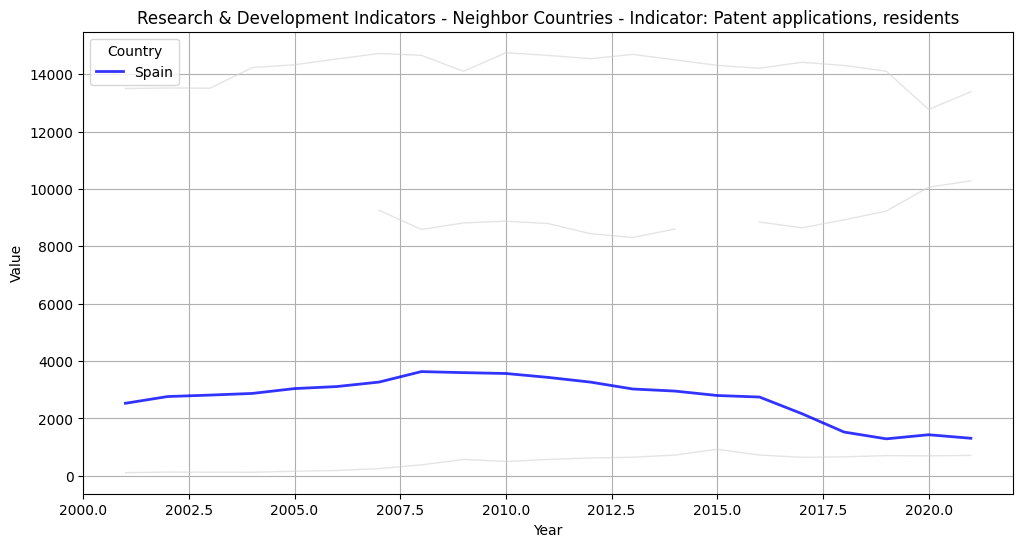

Countries: Innovative
Analyzing indicator: Patent applications, nonresidents, Indicator Code: IP.PAT.NRES


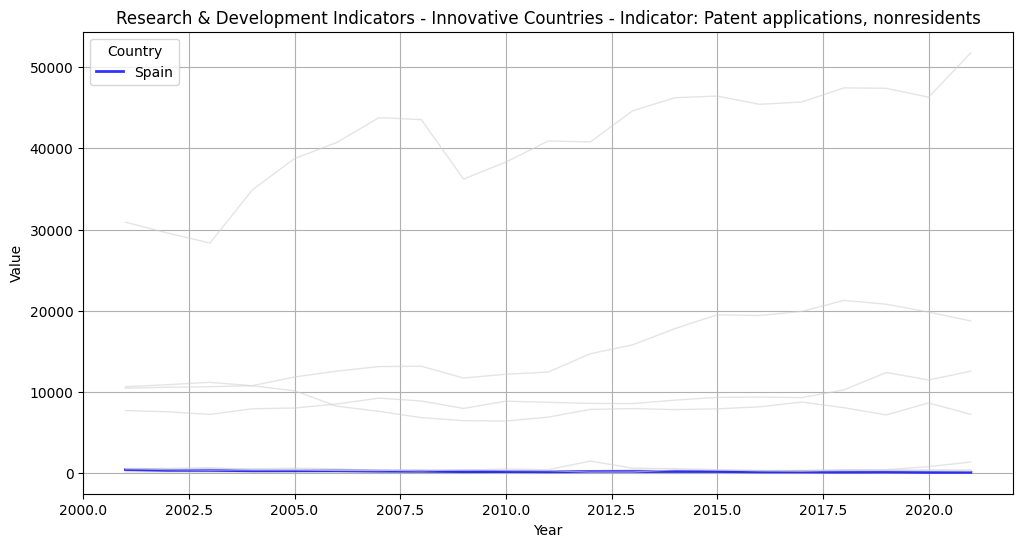

Countries: Neighbor
Analyzing indicator: Patent applications, nonresidents, Indicator Code: IP.PAT.NRES


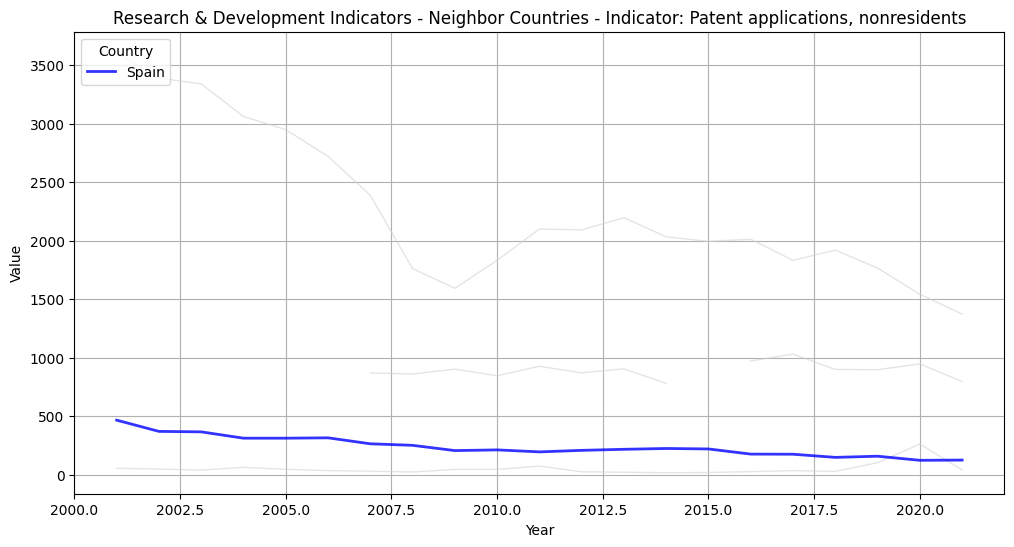

Countries: Innovative
Analyzing indicator: Scientific and technical journal articles, Indicator Code: IP.JRN.ARTC.SC


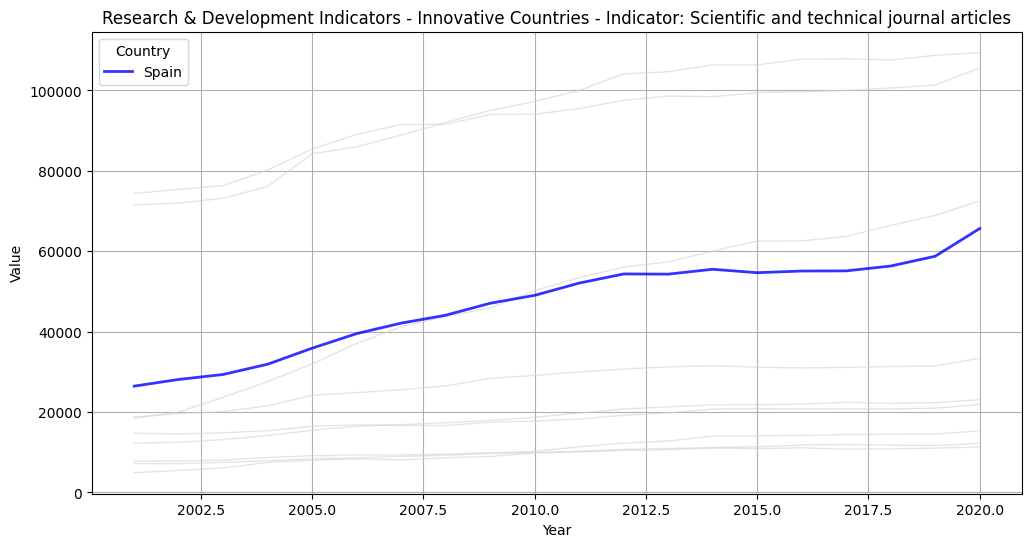

Countries: Neighbor
Analyzing indicator: Scientific and technical journal articles, Indicator Code: IP.JRN.ARTC.SC


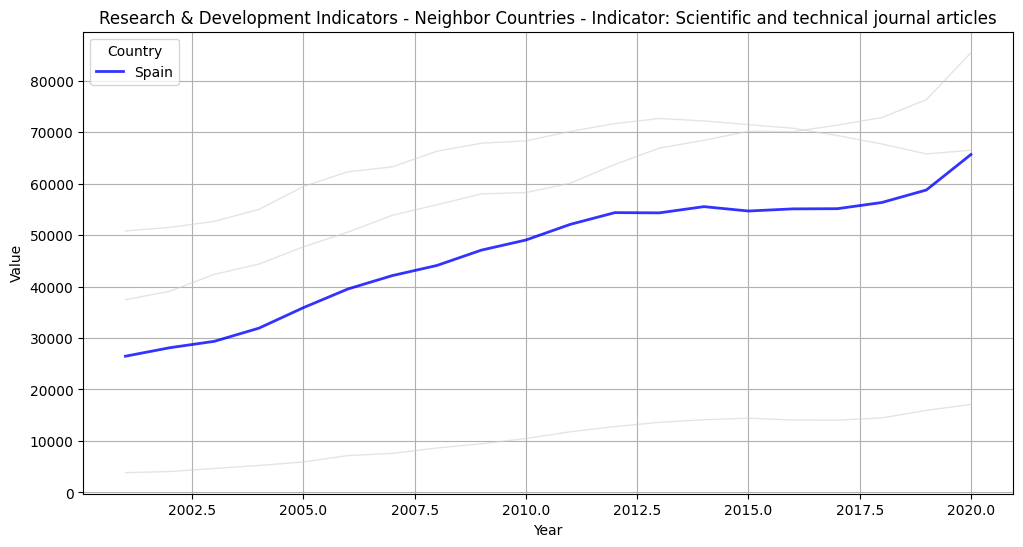

Countries: Innovative
Analyzing indicator: Individuals using the Internet (% of population), Indicator Code: IT.NET.USER.ZS


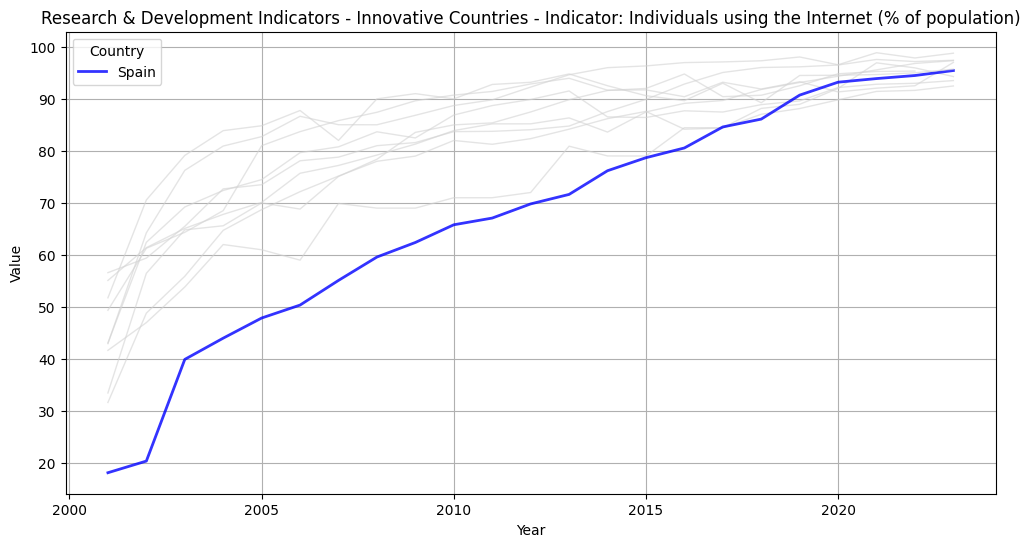

Countries: Neighbor
Analyzing indicator: Individuals using the Internet (% of population), Indicator Code: IT.NET.USER.ZS


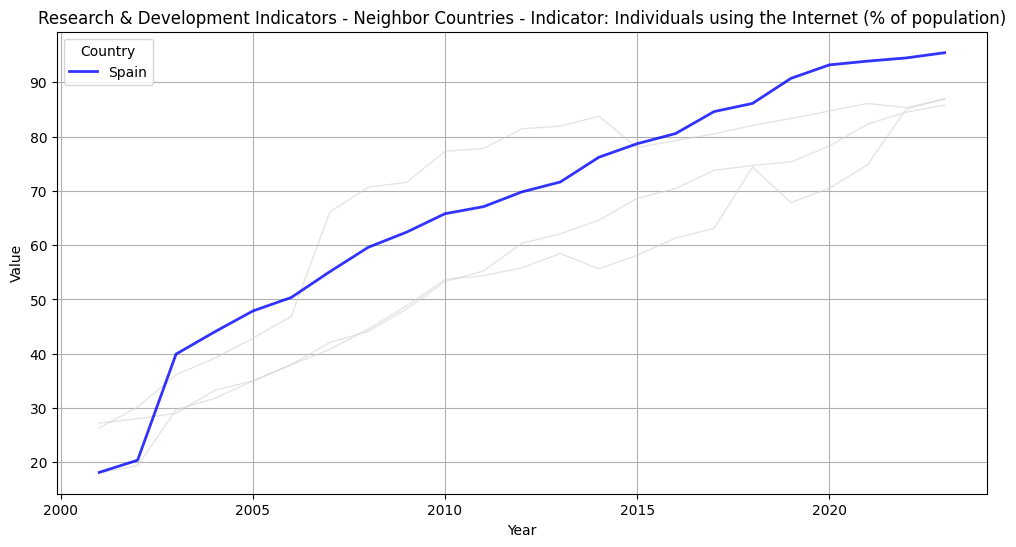

Countries: Innovative
Analyzing indicator: Mobile cellular subscriptions (per 100 people), Indicator Code: IT.CEL.SETS.P2


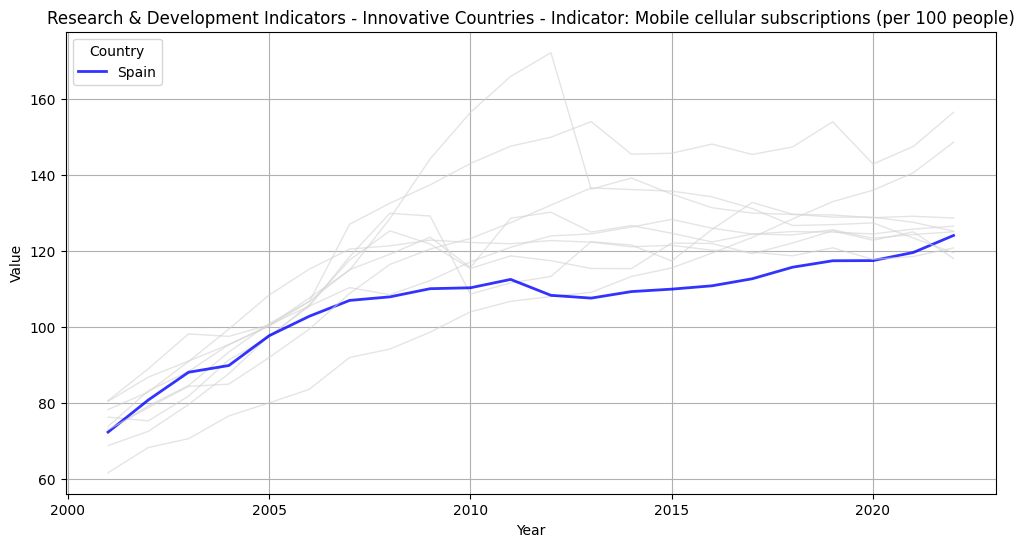

Countries: Neighbor
Analyzing indicator: Mobile cellular subscriptions (per 100 people), Indicator Code: IT.CEL.SETS.P2


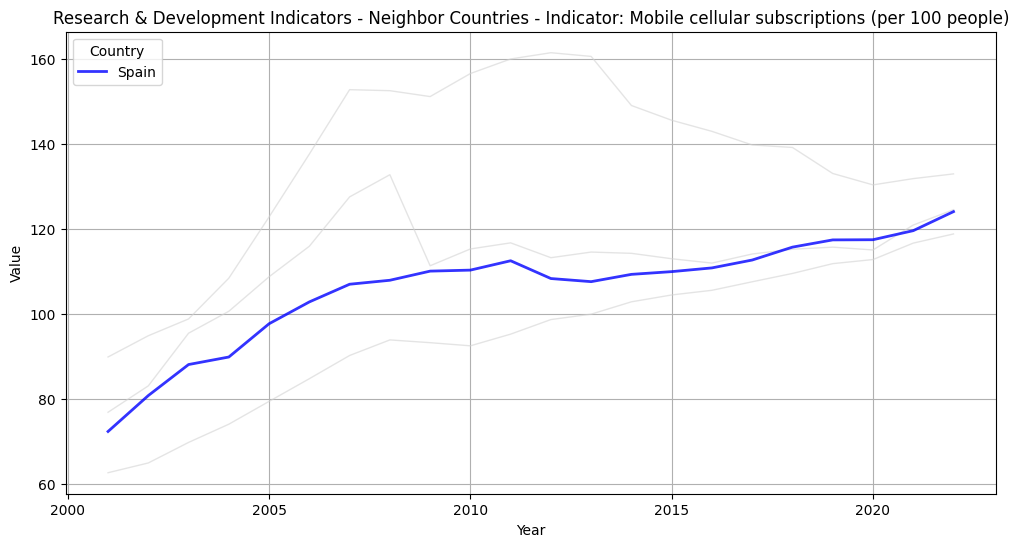

Countries: Innovative
Analyzing indicator: Fixed broadband subscriptions (per 100 people), Indicator Code: IT.NET.BBND.P2


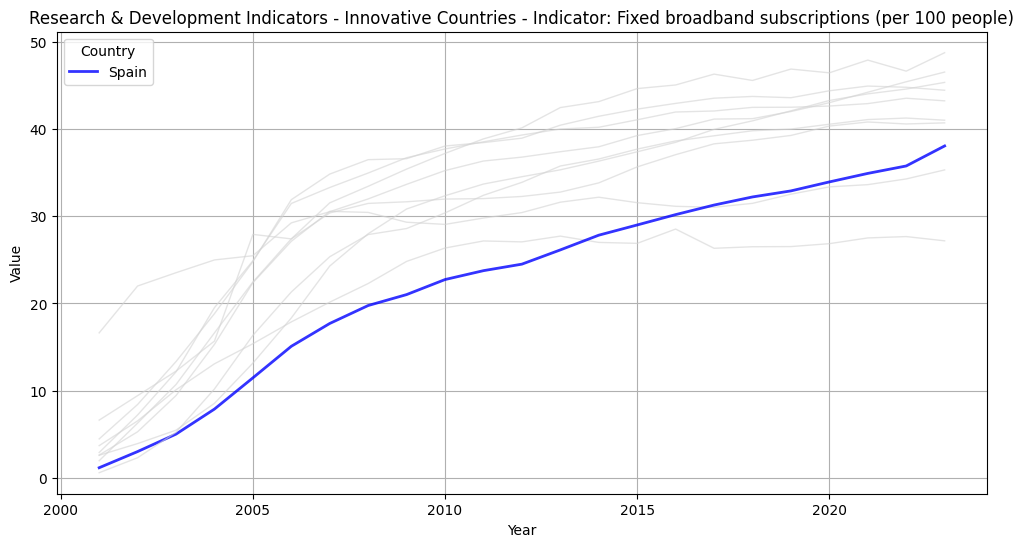

Countries: Neighbor
Analyzing indicator: Fixed broadband subscriptions (per 100 people), Indicator Code: IT.NET.BBND.P2


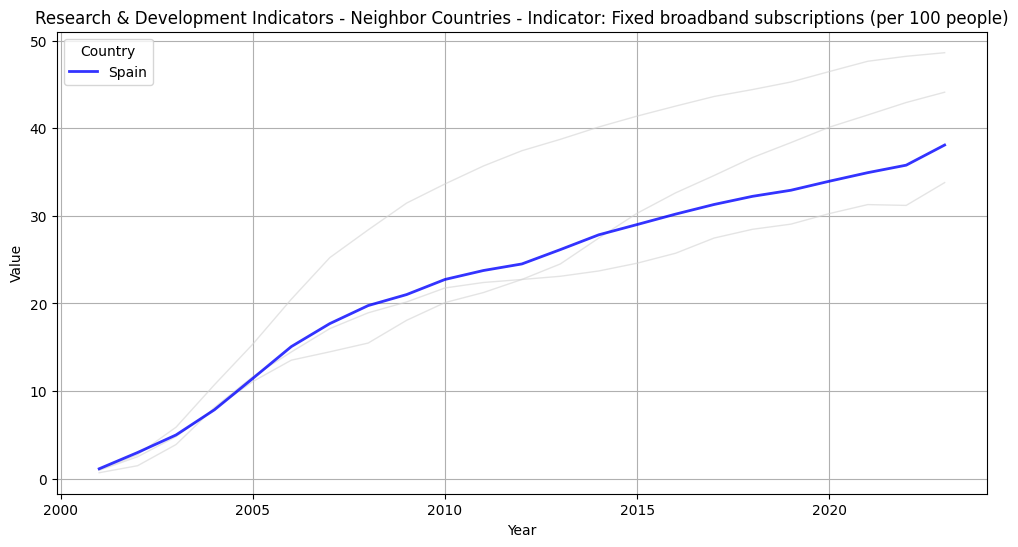

Countries: Innovative
Analyzing indicator: Secure Internet servers (per 1 million people), Indicator Code: IT.NET.SECR.P6


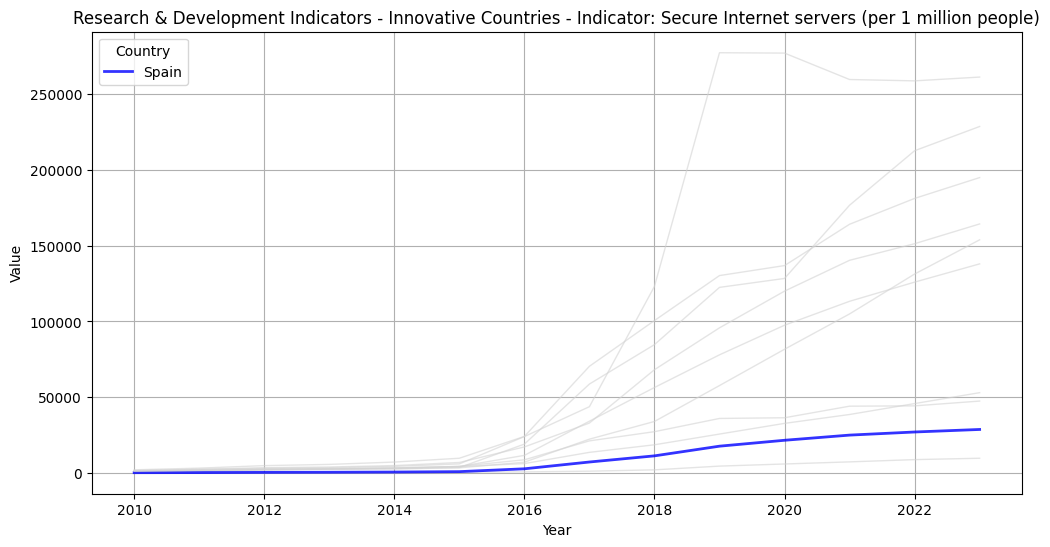

Countries: Neighbor
Analyzing indicator: Secure Internet servers (per 1 million people), Indicator Code: IT.NET.SECR.P6


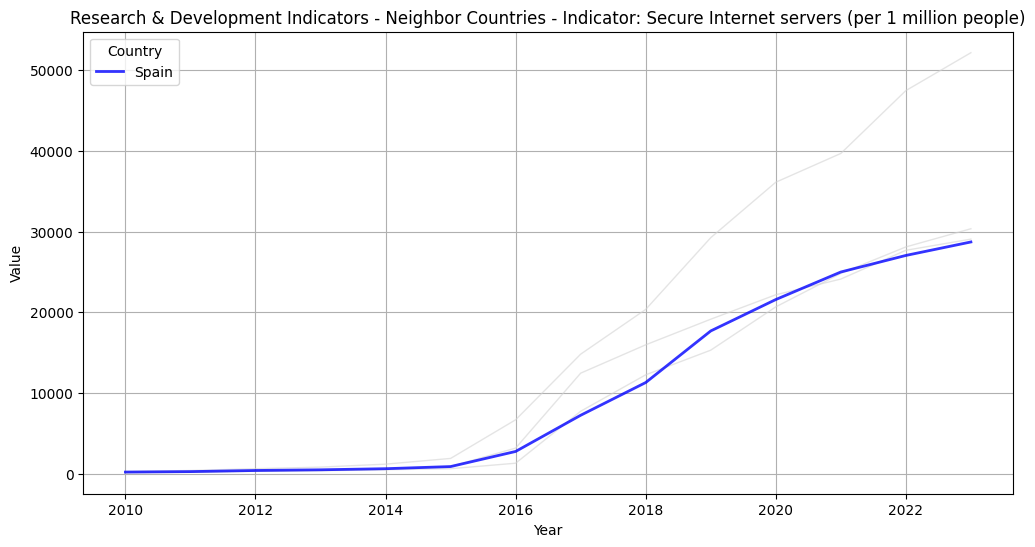

Countries: Innovative
Analyzing indicator: High-technology exports (% of manufactured exports), Indicator Code: TX.VAL.TECH.MF.ZS


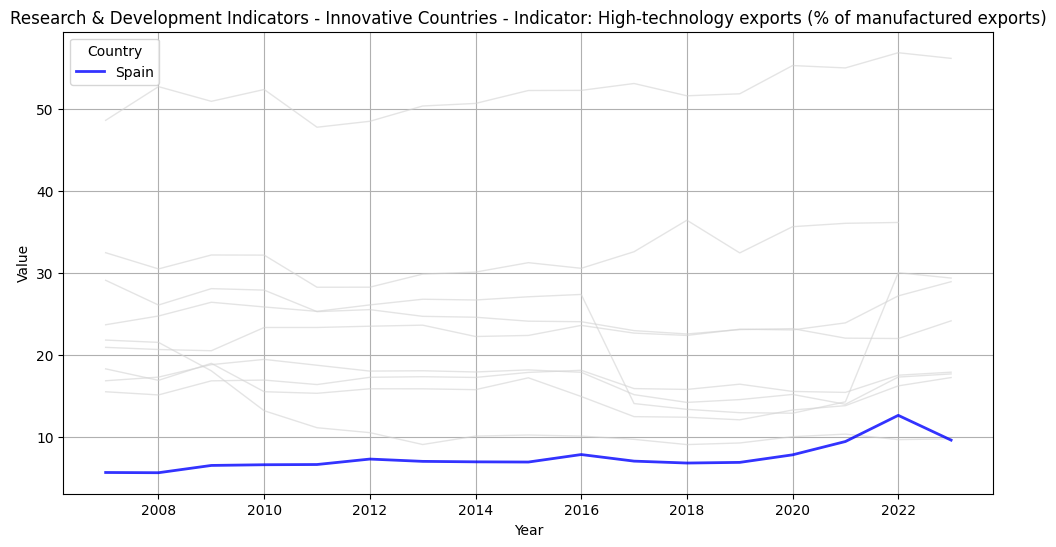

Countries: Neighbor
Analyzing indicator: High-technology exports (% of manufactured exports), Indicator Code: TX.VAL.TECH.MF.ZS


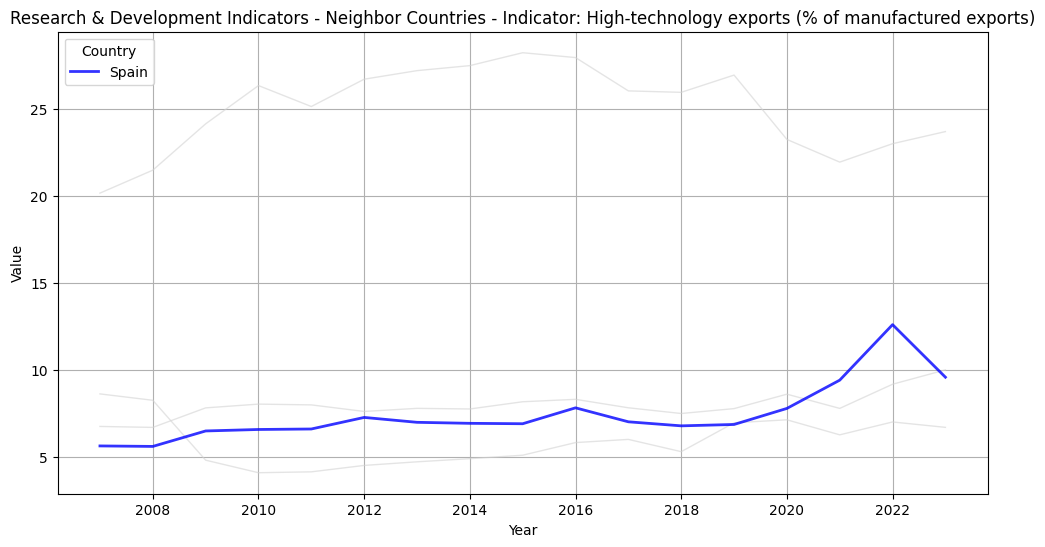

Countries: Innovative
Analyzing indicator: High-technology exports (current US$), Indicator Code: TX.VAL.TECH.CD


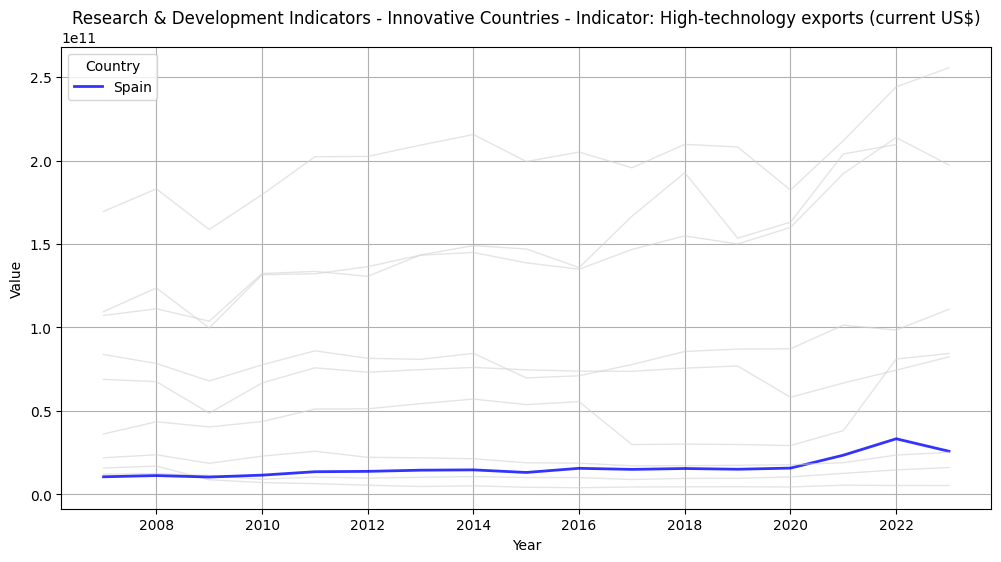

Countries: Neighbor
Analyzing indicator: High-technology exports (current US$), Indicator Code: TX.VAL.TECH.CD


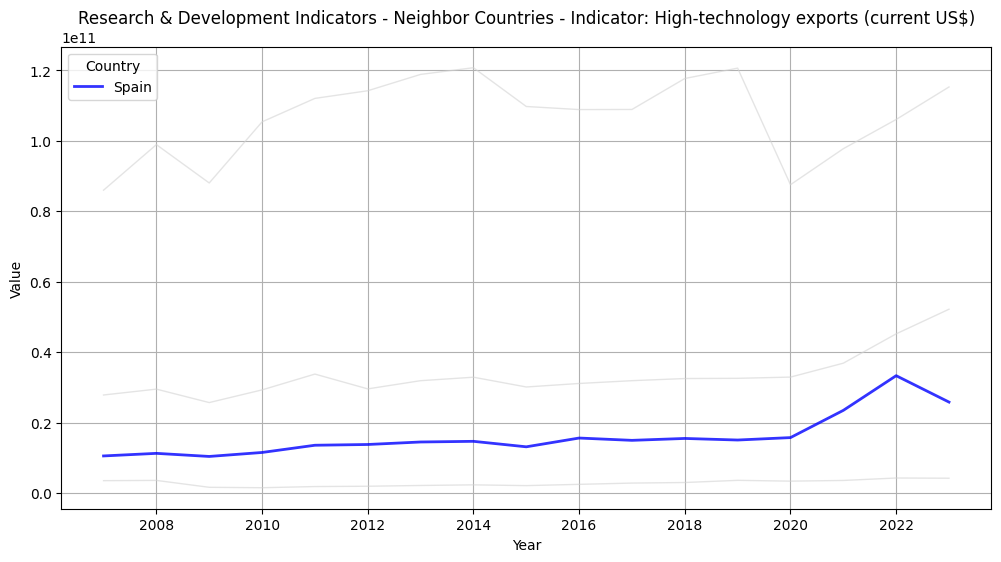

In [98]:
for category_name, indicator_list in categories_indicators:
    print(f"=== Analyzing {category_name} ===")
    analyze_indicators(df, indicator_list, countries, selected_columns, years, category_name)